<a href="https://colab.research.google.com/github/BrainConnection/Qiskit/blob/main/Project%20Quantum%20Challenge%202023/1.%20Quantum%20Chutes%20and%20Ladders/%231%20IONQ%20Simulator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Environment Setting

In [1]:
!pip install qiskit
!pip install qiskit-ionq
!pip install qiskit[visualization]
!pip install matplotlib
!pip install numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 32.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 69.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 66.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 kB 6.7 MB/s eta 0:00:00
  Attempting uninstall: decorator
    Found existing installation: decorator 4.4.2
    Uninstalling decorator-4.4.2:
      Successfully uninstalled decorator-4.4.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 r

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.0 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136818 sha256=81536c31c2511dca8c084d85163ac772e76aece82cffd81e35753b6a6810e5f2
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


In [2]:
from qiskit import transpile
from qiskit_ionq import IonQProvider
from qiskit.visualization import plot_histogram
from matplotlib import pyplot as plt
import numpy as np

from qiskit.circuit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit.library.standard_gates import C3XGate

In [3]:
# Save an IBM Quantum account and set it as your default account.
provider = IonQProvider("UzzeMcx6n1tPMvqRynIZf83nfVMCH3KY")

# Show all backends:
print(provider.backends())

# Get IonQ Hardware backend:
#qpu_backend = provider.get_backend("ionq_qpu.harmony")
qpu_backend = provider.get_backend("ionq_simulator")

[<IonQSimulatorBackend('ionq_simulator')>, <IonQQPUBackend('ionq_qpu')>]


#1. Fair Quantum Coin Operator & Four-Sided Fair Quantum Coin Operator

1) Quantum Coin State

/usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


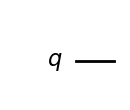

In [4]:
Two_Sided_Fair_Coin = QuantumCircuit(1)
Two_Sided_Fair_Coin.draw("mpl")

2) Fair Quantum Coin Operator

Fair Quantum Coin Operator

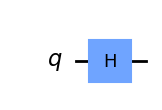

In [5]:
Two_Sided_Fair_Coin = QuantumCircuit(1)
Two_Sided_Fair_Coin.h(0)

Two_Sided_Fair_Coin.draw("mpl")

Verifying Fair Quantum Coin Operator

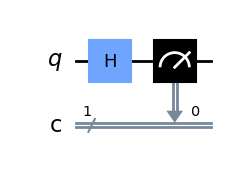

In [6]:
qubits = QuantumRegister(1, 'q')
clbits = ClassicalRegister(1, 'c')
Two_Sided_Fair_Coin_Circuit = QuantumCircuit(qubits, clbits)
(q0,) = qubits
(c0,) = clbits

Two_Sided_Fair_Coin_Circuit.h(q0)
Two_Sided_Fair_Coin_Circuit.measure(q0, c0)

Two_Sided_Fair_Coin_Circuit_basis = transpile(Two_Sided_Fair_Coin_Circuit, qpu_backend)
Two_Sided_Fair_Coin_Circuit_basis.draw("mpl")

{'0': 5051, '1': 4949}
{'0': 0.5, '1': 0.5}


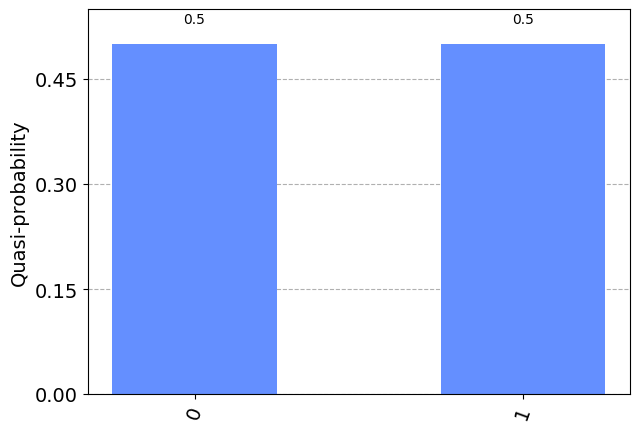

In [7]:
# Run the circuit on IonQ's platform:
job = qpu_backend.run(Two_Sided_Fair_Coin_Circuit_basis, shots=10000)
print(job.get_counts())

print(job.get_probabilities())
plot_histogram(job.get_probabilities(), sort='asc')

3) Four-Sided Quantum Coin State

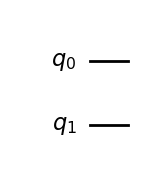

In [8]:
Four_Sided_Fair_Coin = QuantumCircuit(2)
Four_Sided_Fair_Coin.draw("mpl")

4) Four-Sided Fair Quantum Coin Operator

Four-Sided Fair Quantum Coin Operator

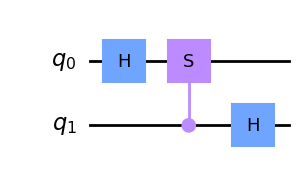

In [9]:
from qiskit.circuit.library.standard_gates import SGate, TGate

csgate = SGate().control(1) # the parameter is the amount of control points you want

Four_Sided_Fair_Coin = QuantumCircuit(2)
Four_Sided_Fair_Coin.h(0)
Four_Sided_Fair_Coin.append(csgate, [1, 0])
Four_Sided_Fair_Coin.h(1)

Four_Sided_Fair_Coin.draw("mpl")

Verifying Four-Sided Fair Quantum Coin Operator

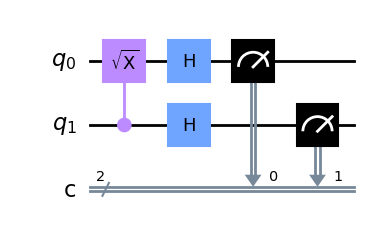

In [10]:
qubits = QuantumRegister(2, 'q')
clbits = ClassicalRegister(2, 'c')
Four_Sided_Fair_Coin_Circuit = QuantumCircuit(qubits, clbits)
(q0,q1,) = qubits
(c0,c1,) = clbits

Four_Sided_Fair_Coin_Circuit.h(q0)
Four_Sided_Fair_Coin_Circuit.append(csgate, [q1, q0])
Four_Sided_Fair_Coin_Circuit.h(q1)
Four_Sided_Fair_Coin_Circuit.measure(qubits, clbits)

Four_Sided_Fair_Coin_Circuit_basis = transpile(Four_Sided_Fair_Coin_Circuit, qpu_backend)
Four_Sided_Fair_Coin_Circuit_basis.draw("mpl")

{'00': 2524, '01': 2540, '10': 2472, '11': 2464}
{'00': 0.25, '01': 0.25, '10': 0.25, '11': 0.25}


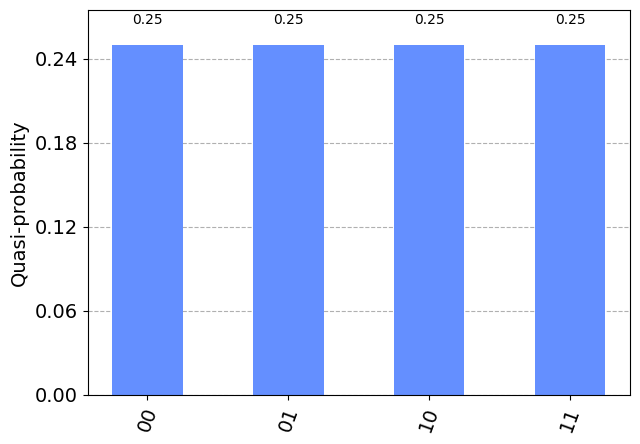

In [11]:
# Run the circuit on IonQ's platform:
job = qpu_backend.run(Four_Sided_Fair_Coin_Circuit_basis, shots=10000)
print(job.get_counts())

print(job.get_probabilities())
plot_histogram(job.get_probabilities(), sort='asc')

5) Fairness Check

all matrix elements of each operator have same absolute value, thus unbiased coin

#2. Location on the Board

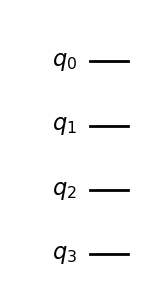

In [12]:
qreg_q = QuantumRegister(4, 'q')
Board = QuantumCircuit(qreg_q)

Board.draw("mpl")

#3. Quantum Coin with Shift Operator

1) Shift Operator

Right Shift Operator

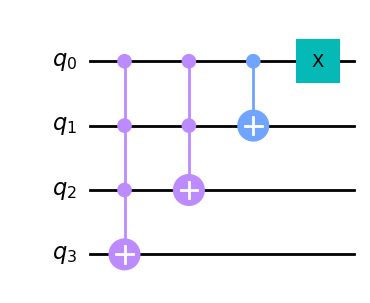

In [13]:
qreg_q = QuantumRegister(4, 'q')
Shift = QuantumCircuit(qreg_q)

Shift.append(C3XGate(), [qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3]])
Shift.ccx(qreg_q[0], qreg_q[1], qreg_q[2])
Shift.cx(qreg_q[0], qreg_q[1])
Shift.x(qreg_q[0])

Shift.draw("mpl")

Verifying Right Shift Operator

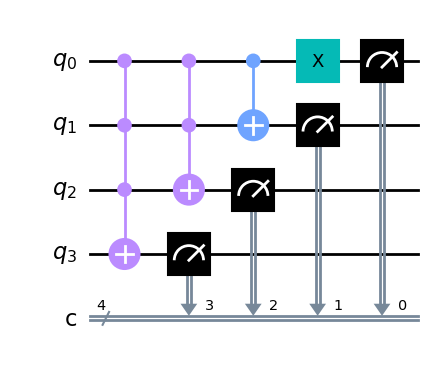

In [14]:
from qiskit.circuit.library.standard_gates import C3XGate

qreg_q = QuantumRegister(4, 'q')
creg_c = ClassicalRegister(4, 'c')
Shift = QuantumCircuit(qreg_q, creg_c)

Shift.append(C3XGate(), [qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3]])
Shift.ccx(qreg_q[0], qreg_q[1], qreg_q[2])
Shift.cx(qreg_q[0], qreg_q[1])
Shift.x(qreg_q[0])

Shift.measure(qreg_q, creg_c)

Shift_basis = transpile(Shift, qpu_backend)
Shift_basis.draw("mpl")

{'0001': 10000}
{'0001': 1.0}


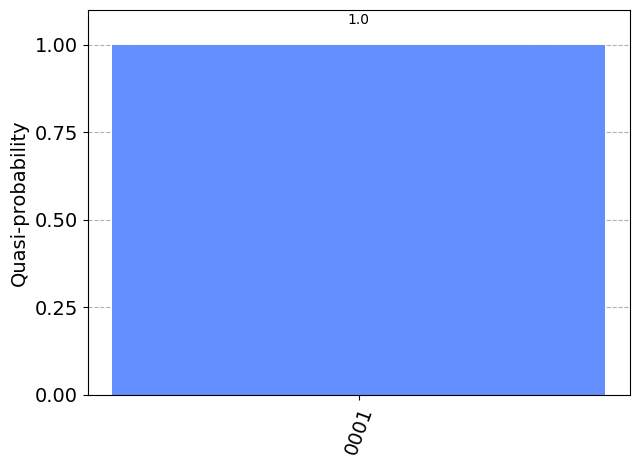

In [15]:
# Run the circuit on IonQ's platform:
job = qpu_backend.run(Shift_basis, shots=10000)
print(job.get_counts())

print(job.get_probabilities())
plot_histogram(job.get_probabilities(), sort='asc')

2) Shift Operator with Quantum Coin Operator

Shift Operator

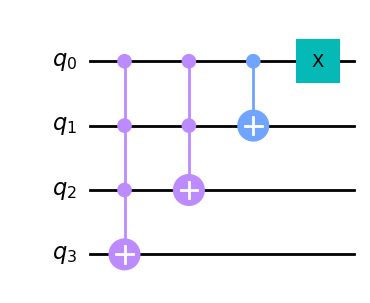

In [16]:
Shift = QuantumCircuit(4)
Shift.append(C3XGate(), [0,1,2,3])
Shift.ccx(0,1,2)
Shift.cx(0,1)
Shift.x(0)

Shift.draw("mpl")

1 Step Board Evolution Operator

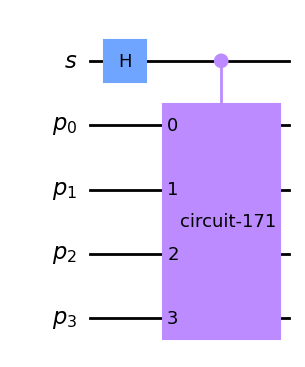

In [17]:
coin_bit = QuantumRegister(1, 's')
position_bits = QuantumRegister(4, 'p')
circuit = QuantumCircuit(coin_bit, position_bits)

s = coin_bit
p0, p1, p2, p3 = position_bits

Ugate = Shift.to_gate().control(1)
circuit.h(s)
circuit.append(Ugate, [s, p0, p1, p2, p3])

circuit.draw("mpl")

N Step Board Evolution Operator

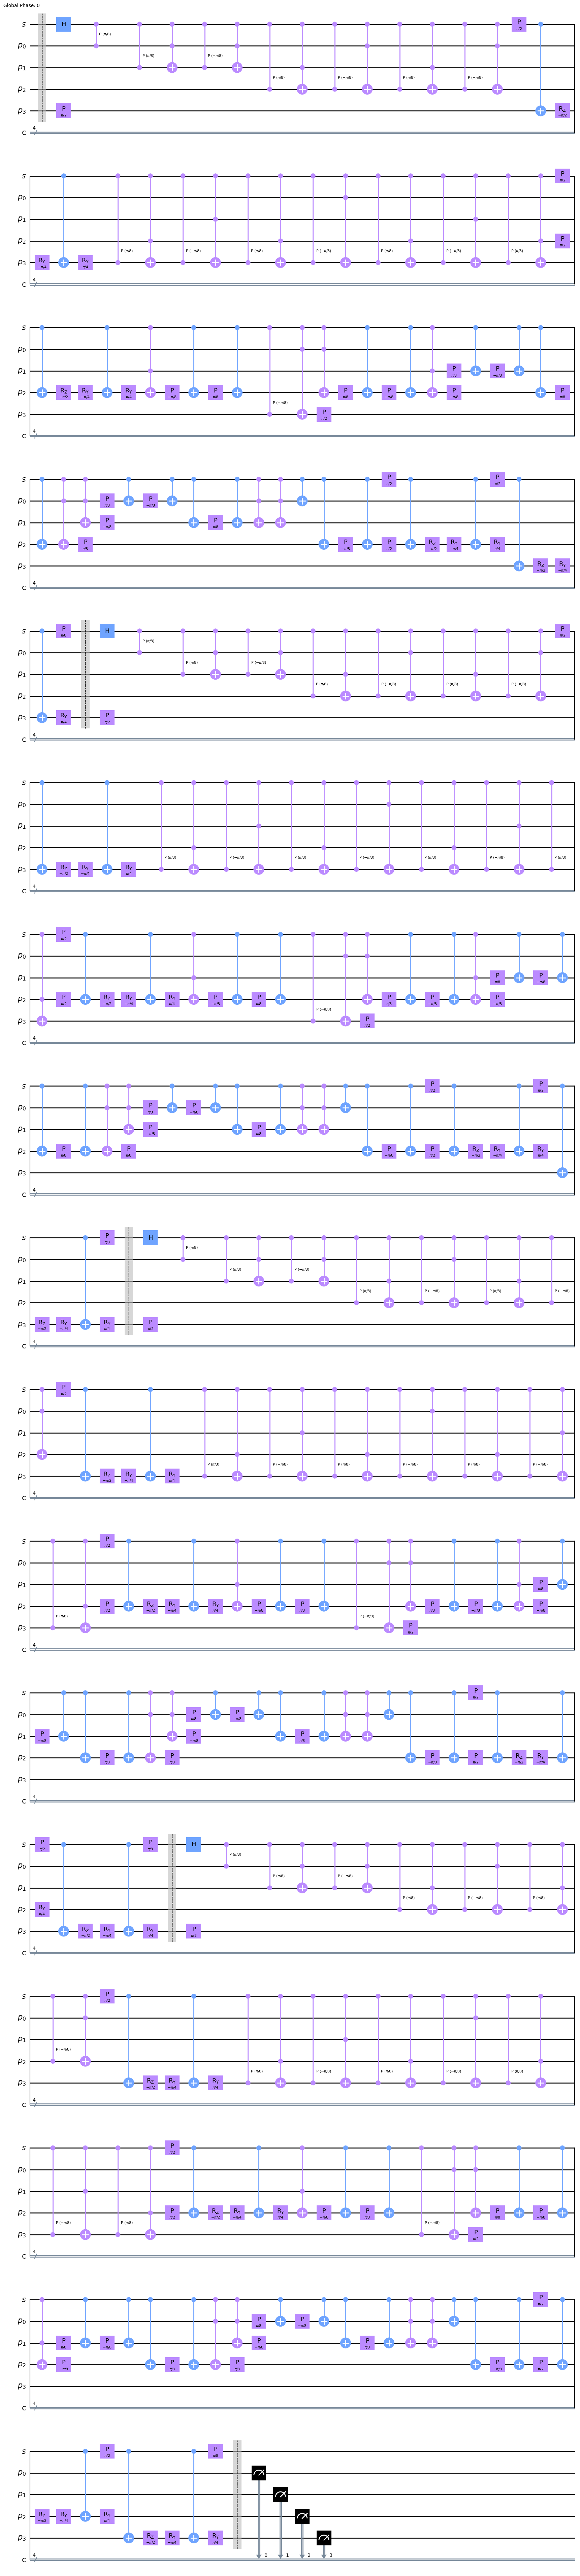

In [18]:
# varying N
N = 4

coin_bit = QuantumRegister(1, 's')
position_bits = QuantumRegister(4, 'p')
classical_bits = ClassicalRegister(4, 'c')
circuit = QuantumCircuit(coin_bit, position_bits, classical_bits)

s = coin_bit
p0, p1, p2, p3 = position_bits
c0, c1, c2, c3 = classical_bits

Ugate = Shift.to_gate().control(1)

for i in range(N):
  circuit.barrier()
  circuit.h(s)
  circuit.append(Ugate, [s, p0, p1, p2, p3])

circuit.barrier()

circuit.measure([p0, p1, p2, p3], [c0, c1, c2, c3])

circuit_basis = transpile(circuit, qpu_backend)
circuit_basis.draw("mpl")

{'0000': 639, '0001': 6224, '0010': 1210, '0011': 1303, '0100': 624}
{'0000': 0.0625, '0001': 0.625, '0010': 0.125, '0011': 0.125, '0100': 0.0625}


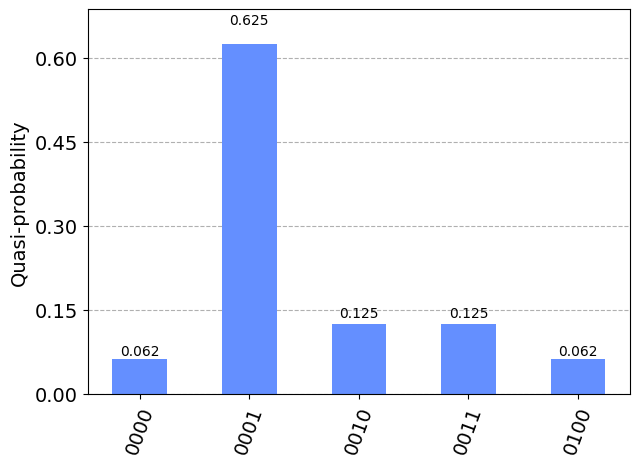

In [19]:
# Run the circuit on IonQ's platform:
job = qpu_backend.run(circuit_basis, shots=10000)
print(job.get_counts())

print(job.get_probabilities())
plot_histogram(job.get_probabilities(), sort='asc')

Verifying N Step Board Evolution Operator

0
{'0000': 1000}
{'0000': 1.0}
variance :  0.05859375
entropy :  0.0


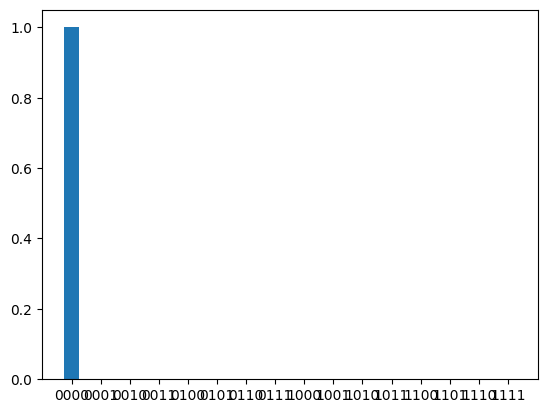



1
{'0000': 506, '0001': 494}
{'0000': 0.5, '0001': 0.5}
variance :  0.02734375
entropy :  0.6931471805599453


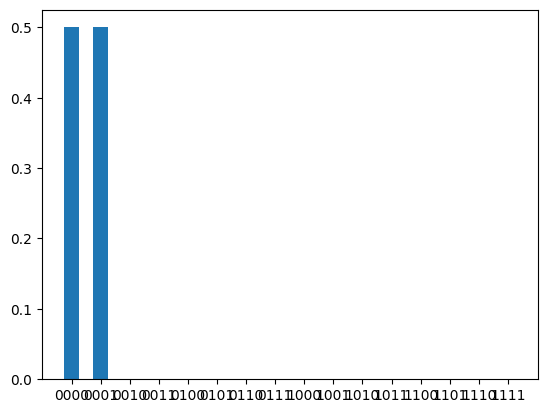



2
{'0000': 230, '0001': 530, '0010': 240}
{'0000': 0.25, '0001': 0.5, '0010': 0.25}
variance :  0.01953125
entropy :  1.0397207708399179


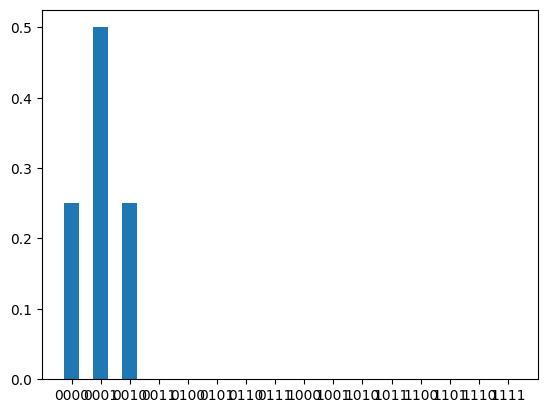



3
{'0000': 119, '0001': 631, '0010': 136, '0011': 114}
{'0000': 0.125, '0001': 0.625, '0010': 0.125, '0011': 0.125}
variance :  0.0234375
entropy :  1.0735428464085233


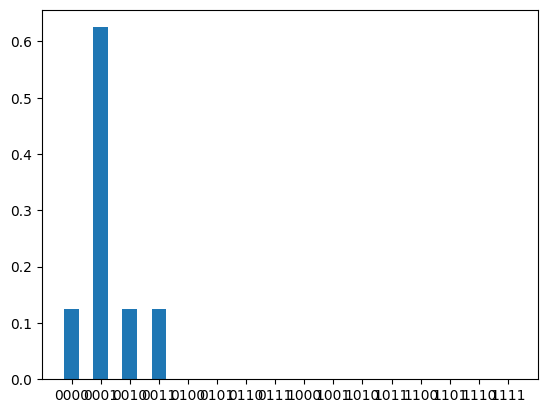



4
{'0000': 58, '0001': 634, '0010': 127, '0011': 128, '0100': 53}
{'0000': 0.0625, '0001': 0.625, '0010': 0.125, '0011': 0.125, '0100': 0.0625}
variance :  0.02294921875
entropy :  1.1601862439785164


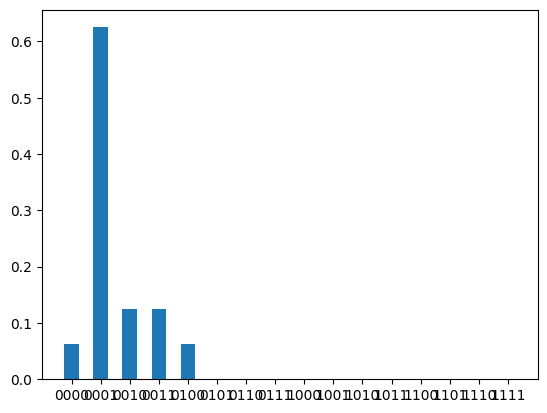



5
{'0000': 35, '0001': 510, '0010': 116, '0011': 148, '0100': 160, '0101': 31}
{'0000': 0.03125, '0001': 0.53125, '0010': 0.125, '0011': 0.125, '0100': 0.15625, '0101': 0.03125}
variance :  0.017333984375
entropy :  1.362543049672061


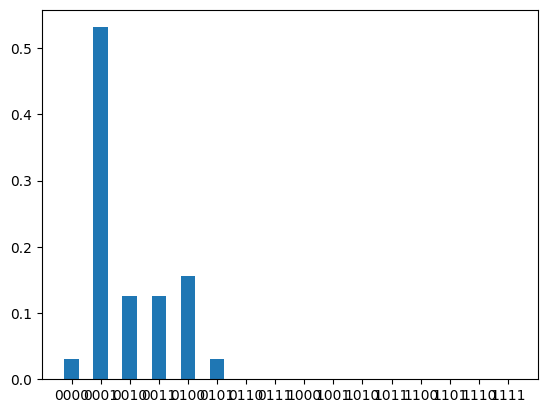



6
{'0000': 24, '0001': 393, '0010': 190, '0011': 138, '0100': 77, '0101': 157, '0110': 21}
{'0000': 0.015625, '0001': 0.40625, '0010': 0.203125, '0011': 0.125, '0100': 0.078125, '0101': 0.15625, '0110': 0.015625}
variance :  0.01190185546875
entropy :  1.568829576154857


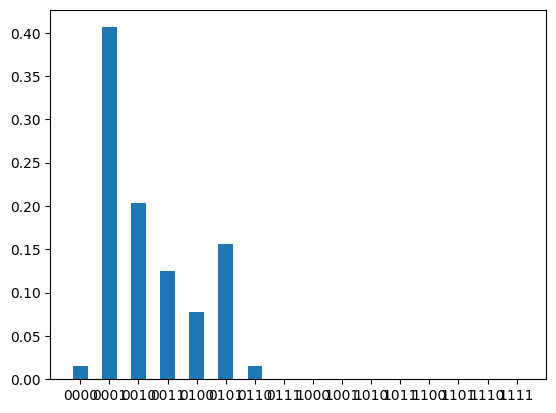



7
{'0000': 4, '0001': 295, '0010': 323, '0011': 146, '0100': 76, '0101': 30, '0110': 121, '0111': 5}
{'0000': 0.0078125, '0001': 0.2890625, '0010': 0.3203125, '0011': 0.1328125, '0100': 0.0703125, '0101': 0.0390625, '0110': 0.1328125, '0111': 0.0078125}
variance :  0.010345458984375
entropy :  1.6488124361163303


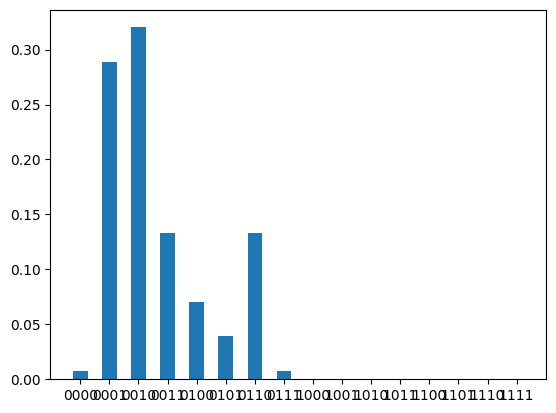



8
{'0000': 4, '0001': 204, '0010': 415, '0011': 99, '0100': 70, '0101': 69, '0110': 40, '0111': 91, '1000': 8}
{'0000': 0.00390625, '0001': 0.1953125, '0010': 0.4140625, '0011': 0.1015625, '0100': 0.0703125, '0101': 0.0703125, '0110': 0.0390625, '0111': 0.1015625, '1000': 0.00390625}
variance :  0.011198043823242188
entropy :  1.6919510833912583


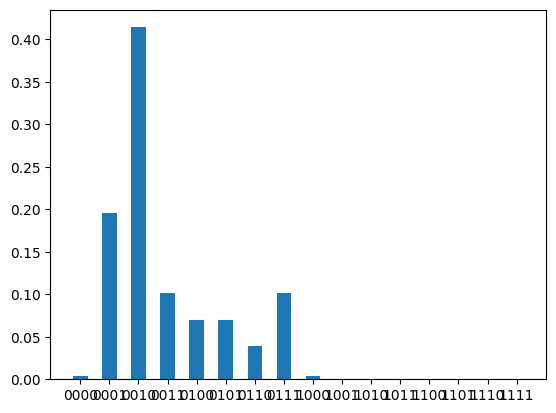



9
{'0000': 3, '0001': 129, '0010': 435, '0011': 50, '0100': 68, '0101': 76, '0110': 78, '0111': 77, '1000': 81, '1001': 3}
{'0000': 0.001953125, '0001': 0.126953125, '0010': 0.453125, '0011': 0.0625, '0100': 0.0703125, '0101': 0.0703125, '0110': 0.078125, '0111': 0.0625, '1000': 0.072265625, '1001': 0.001953125}
variance :  0.011748313903808594
entropy :  1.7540319589258038


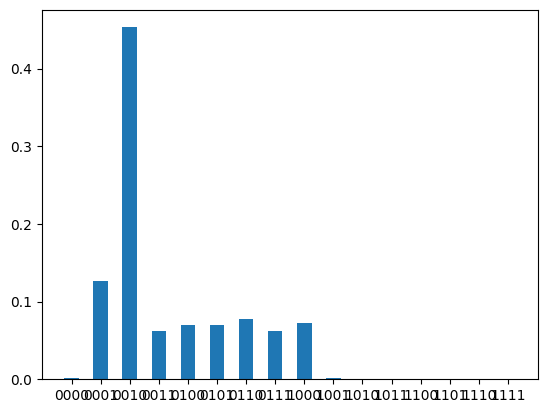



10
{'0000': 1, '0001': 87, '0010': 411, '0011': 74, '0100': 105, '0101': 79, '0110': 59, '0111': 58, '1000': 70, '1001': 56, '1010': 0}
{'0000': 0.000976562, '0001': 0.080078124, '0010': 0.438476562, '0011': 0.0625, '0100': 0.09765625, '0101': 0.0703125, '0110': 0.05078125, '0111': 0.0625, '1000': 0.086914062, '1001': 0.048828124, '1010': 0.000976563}
variance :  0.010686635945556642
entropy :  1.848724995509748


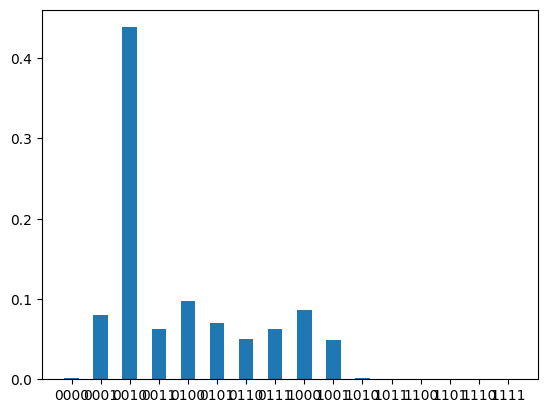



11
{'0000': 2, '0001': 48, '0010': 404, '0011': 116, '0100': 122, '0101': 65, '0110': 48, '0111': 39, '1000': 23, '1001': 93, '1010': 39, '1011': 1}
{'0000': 0.000488281, '0001': 0.049316406, '0010': 0.387207031, '0011': 0.113769531, '0100': 0.126953125, '0101': 0.072265625, '0110': 0.048828125, '0111': 0.033203125, '1000': 0.035644531, '1001': 0.100097656, '1010': 0.031738281, '1011': 0.000488281}
variance :  0.008745551102478027
entropy :  1.9416546801321988


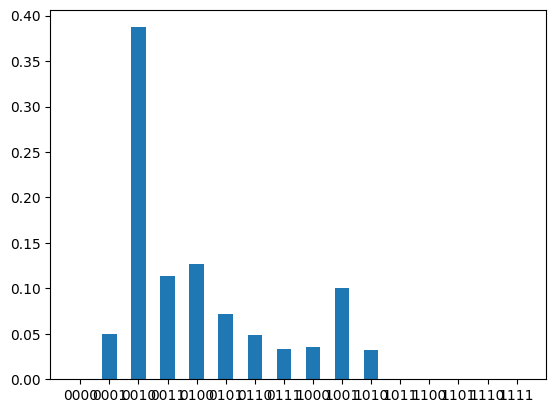



12
{'0000': 0, '0001': 35, '0010': 324, '0011': 189, '0100': 116, '0101': 54, '0110': 56, '0111': 40, '1000': 28, '1001': 22, '1010': 112, '1011': 24, '1100': 0}
{'0000': 0.000244141, '0001': 0.029785157, '0010': 0.31884765699999995, '0011': 0.195800782, '0100': 0.124267578, '0101': 0.056640624, '0110': 0.048828124, '0111': 0.048828124, '1000': 0.038330079, '1001': 0.018066407, '1010': 0.100097657, '1011': 0.020019532, '1100': 0.000244141}
variance :  0.007126495265663145
entropy :  2.0152919331132915


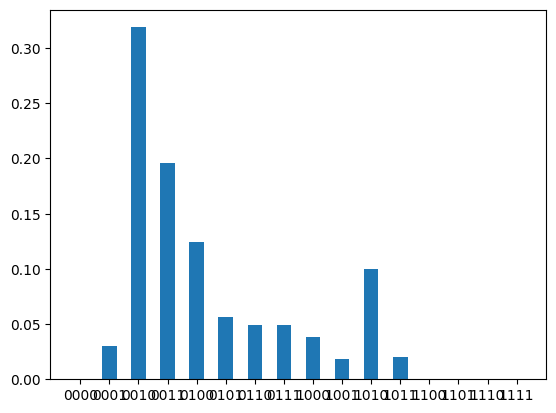



13
{'0000': 0, '0001': 21, '0010': 248, '0011': 291, '0100': 82, '0101': 46, '0110': 48, '0111': 51, '1000': 50, '1001': 64, '1010': 15, '1011': 72, '1100': 12, '1101': 0}
{'0000': 0.00012207, '0001': 0.017700195, '0010': 0.248535156, '0011': 0.277832031, '0100': 0.089477539, '0101': 0.04309082, '0110': 0.048828125, '0111': 0.048828125, '1000': 0.051879883, '1001': 0.052856445, '1010': 0.018066406, '1011': 0.090332031, '1100': 0.012329101, '1101': 0.00012207}
variance :  0.0065955445158424365
entropy :  2.0745840612213278


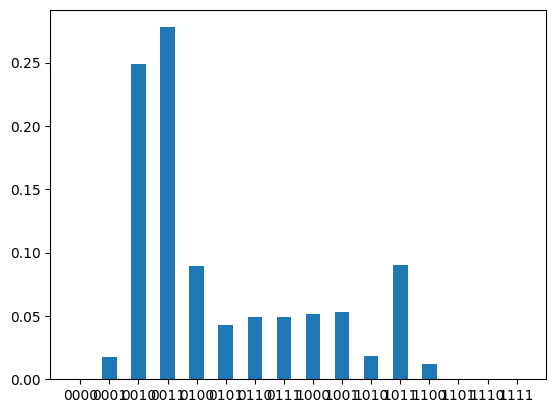



14
{'0000': 0, '0001': 11, '0010': 172, '0011': 345, '0100': 46, '0101': 58, '0110': 69, '0111': 45, '1000': 37, '1001': 42, '1010': 54, '1011': 29, '1100': 80, '1101': 12, '1110': 0}
{'0000': 6.1035e-05, '0001': 0.010375975999999999, '0010': 0.18536377, '0011': 0.33642578199999995, '0100': 0.050109864000000004, '0101': 0.056274414, '0110': 0.062561035, '0111': 0.048828124, '1000': 0.038146972, '1001': 0.039672852, '1010': 0.057434082, '1011': 0.031738282, '1100': 0.075500489, '1101': 0.007446289, '1110': 6.1035e-05}
variance :  0.006888529324898719
entropy :  2.1180426337735905


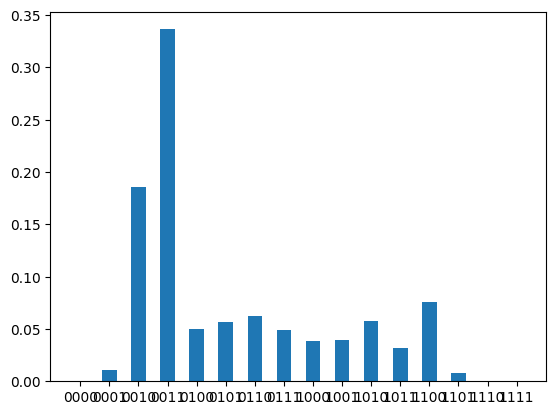



15
{'0000': 0, '0001': 1, '0010': 115, '0011': 358, '0100': 36, '0101': 76, '0110': 92, '0111': 54, '1000': 35, '1001': 27, '1010': 20, '1011': 53, '1100': 57, '1101': 69, '1110': 7, '1111': 0}
{'0000': 3.0518e-05, '0001': 0.006011963, '0010': 0.13333129900000001, '0011': 0.361602783, '0100': 0.034942627, '0101': 0.090484619, '0110': 0.074005127, '0111': 0.049591064, '1000': 0.037384033, '1001': 0.028228759, '1010': 0.023223877, '1011': 0.046905517, '1100': 0.050323486, '1101': 0.05947876, '1110': 0.004425049, '1111': 3.0518e-05}
variance :  0.00715238134376955
entropy :  2.1408380543276286


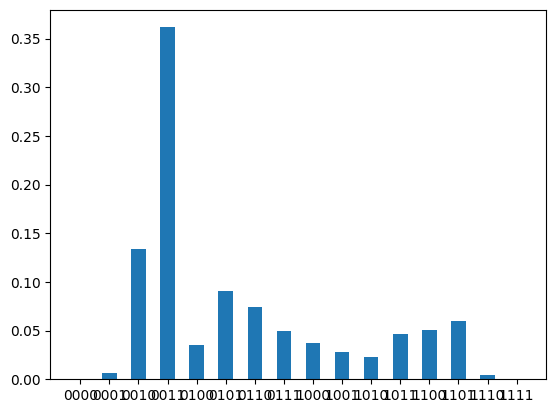



16
{'0000': 0, '0001': 3, '0010': 116, '0011': 304, '0100': 63, '0101': 129, '0110': 69, '0111': 51, '1000': 34, '1001': 32, '1010': 37, '1011': 16, '1100': 36, '1101': 74, '1110': 34, '1111': 2}
{'0000': 3.0518e-05, '0001': 0.003448487, '0010': 0.093048095, '0011': 0.354888916, '0100': 0.056304932, '0101': 0.118682861, '0110': 0.06448364300000001, '0111': 0.040435791, '1000': 0.037384034, '1001': 0.037384034, '1010': 0.032745361, '1011': 0.018707276, '1100': 0.028961182, '1101': 0.066192627, '1110': 0.044708251000000004, '1111': 0.002593994}
variance :  0.006663010436292171
entropy :  2.1986975433125897


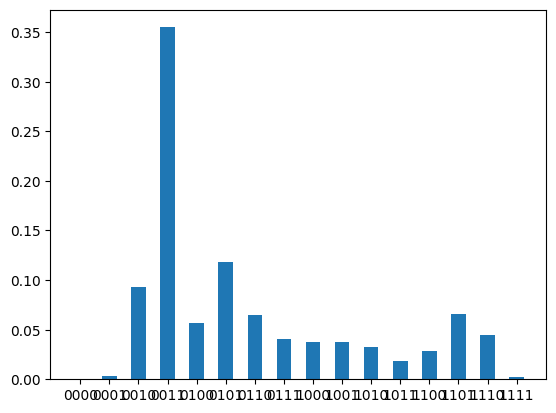



17
{'0000': 2, '0001': 2, '0010': 75, '0011': 330, '0100': 108, '0101': 132, '0110': 36, '0111': 32, '1000': 33, '1001': 31, '1010': 38, '1011': 41, '1100': 22, '1101': 21, '1110': 68, '1111': 29}
{'0000': 0.001495361, '0001': 0.001983643, '0010': 0.063293457, '0011': 0.32434082, '0100': 0.108215332, '0101': 0.119750976, '0110': 0.042053223, '0111': 0.034301758, '1000': 0.037384033, '1001': 0.037384033, '1010': 0.038879394, '1011': 0.041137695, '1100': 0.027893066, '1101': 0.014282226, '1110': 0.075256348, '1111': 0.032348633}
variance :  0.005587259066676736
entropy :  2.2751170202113857


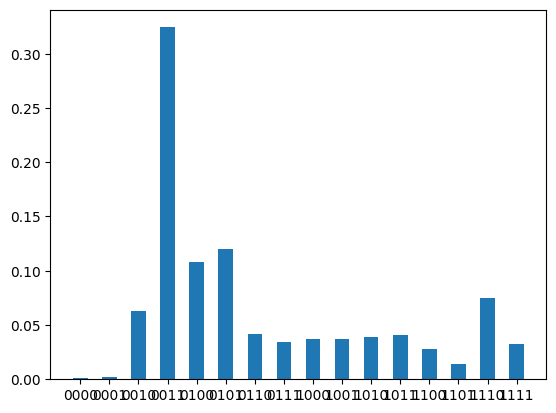



18
{'0000': 22, '0001': 2, '0010': 47, '0011': 308, '0100': 163, '0101': 81, '0110': 25, '0111': 44, '1000': 52, '1001': 36, '1010': 26, '1011': 24, '1100': 38, '1101': 43, '1110': 9, '1111': 80}
{'0000': 0.022781372, '0001': 0.001983643, '0010': 0.042007447, '0011': 0.279907226, '0100': 0.17413330100000002, '0101': 0.093383789, '0110': 0.030822754, '0111': 0.045532227, '1000': 0.045608521, '1001': 0.037384034, '1010': 0.030654907999999998, '1011': 0.029907227, '1100': 0.039123535, '1101': 0.040649414, '1110': 0.009338378, '1111': 0.076782226}
variance :  0.004667461304685504
entropy :  2.334966285836431


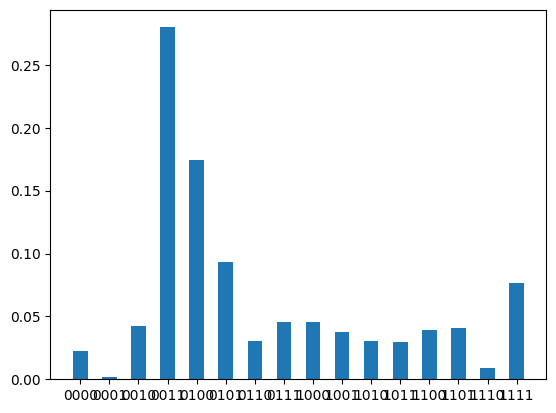



19
{'0000': 66, '0001': 20, '0010': 30, '0011': 217, '0100': 244, '0101': 58, '0110': 46, '0111': 56, '1000': 47, '1001': 33, '1010': 36, '1011': 21, '1100': 20, '1101': 28, '1110': 51, '1111': 27}
{'0000': 0.071907043, '0001': 0.015480042, '0010': 0.028511047, '0011': 0.230781555, '0100': 0.236236572, '0101': 0.056304932, '0110': 0.044708252000000004, '0111': 0.065216064, '1000': 0.051216125, '1001': 0.037757873, '1010': 0.030281067, '1011': 0.024299621, '1100': 0.019439697, '1101': 0.026763916, '1110': 0.046417236, '1111': 0.014678955}
variance :  0.004452099407858982
entropy :  2.3635844027241806


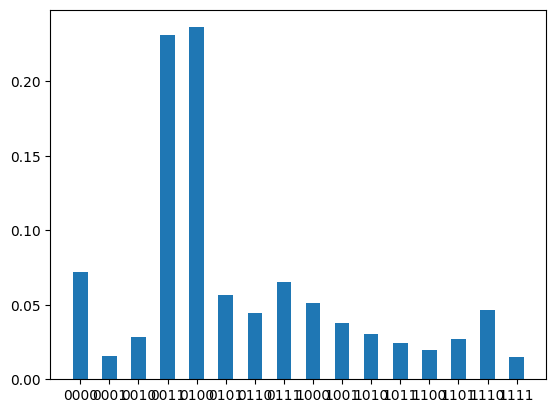



20
{'0000': 31, '0001': 69, '0010': 22, '0011': 191, '0100': 274, '0101': 32, '0110': 72, '0111': 67, '1000': 56, '1001': 30, '1010': 21, '1011': 37, '1100': 26, '1101': 20, '1110': 10, '1111': 42}
{'0000': 0.027027131, '0001': 0.066139221, '0010': 0.028511047, '0011': 0.180122375, '0100': 0.281116486, '0101': 0.029449463000000002, '0110': 0.07632446300000001, '0111': 0.07254028300000001, '1000': 0.042804718, '1001': 0.031776427999999995, '1010': 0.030281066, '1011': 0.030281066, '1100': 0.027851104999999998, '1101': 0.019439698, '1110': 0.014801025, '1111': 0.041534423}
variance :  0.004663544624495442
entropy :  2.361732130098686


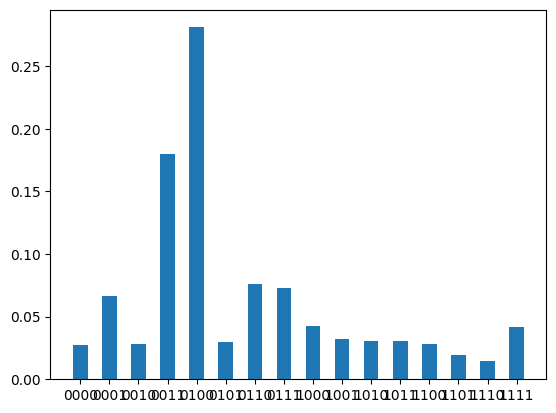



21
{'0000': 35, '0001': 38, '0010': 60, '0011': 137, '0100': 319, '0101': 27, '0110': 109, '0111': 62, '1000': 28, '1001': 29, '1010': 28, '1011': 33, '1100': 32, '1101': 29, '1110': 24, '1111': 10}
{'0000': 0.029344559, '0001': 0.03802681, '0010': 0.0570755, '0011': 0.151557922, '0100': 0.309228897, '0101': 0.027132034, '0110': 0.10562133800000001, '0111': 0.059112549, '1000': 0.029253006, '1001': 0.028505325, '1010': 0.030281067, '1011': 0.030281067, '1100': 0.031122208, '1101': 0.032991409, '1110': 0.02822876, '1111': 0.012237549}
variance :  0.005221824980491517
entropy :  2.3343300258440065


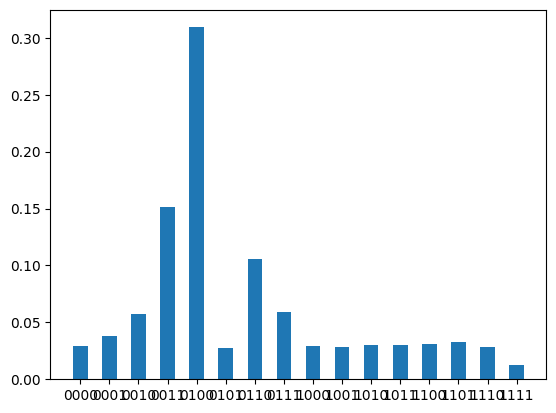



22
{'0000': 28, '0001': 17, '0010': 74, '0011': 154, '0100': 291, '0101': 42, '0110': 109, '0111': 27, '1000': 29, '1001': 41, '1010': 43, '1011': 27, '1100': 30, '1101': 22, '1110': 31, '1111': 35}
{'0000': 0.019471169, '0001': 0.017145157, '0010': 0.075177193, '0011': 0.15155792299999998, '0100': 0.291127205, '0101': 0.048013687, '0110': 0.11549472799999999, '0111': 0.036407471, '1000': 0.028260230999999997, '1001': 0.037103653, '1010': 0.035748481, '1011': 0.030281066, '1100': 0.025654792, '1101': 0.024393081, '1110': 0.029221535, '1111': 0.034942627}
variance :  0.004763605732171555
entropy :  2.354847279006106


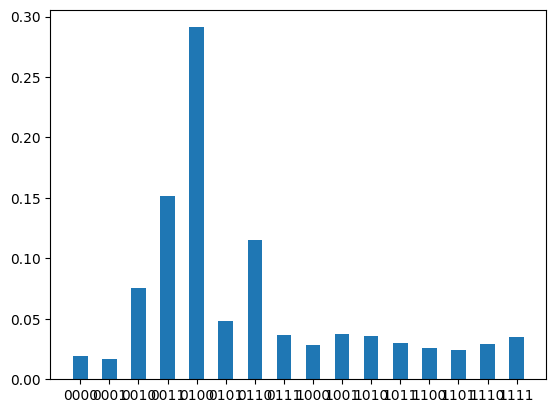



23
{'0000': 33, '0001': 38, '0010': 2, '0011': 115, '0100': 336, '0101': 107, '0110': 95, '0111': 17, '1000': 59, '1001': 57, '1010': 30, '1011': 28, '1100': 27, '1101': 17, '1110': 16, '1111': 23}
{'0000': 0.032215595, '0001': 0.032286167000000005, '0010': 0.003387928, '0011': 0.10171175, '0100': 0.34097337699999997, '0101': 0.119802952, '0110': 0.100353718, '0111': 0.023663044, '1000': 0.044231892, '1001': 0.049017429, '1010': 0.03890276, '1011': 0.030491352, '1100': 0.025444508, '1101': 0.021238804, '1110': 0.017307758, '1111': 0.018970966}
variance :  0.00623398003138543
entropy :  2.252771170402789


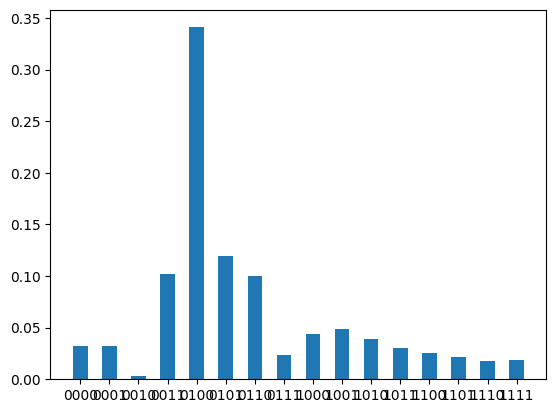



24
{'0000': 14, '0001': 17, '0010': 39, '0011': 104, '0100': 343, '0101': 117, '0110': 75, '0111': 34, '1000': 58, '1001': 37, '1010': 32, '1011': 40, '1100': 21, '1101': 21, '1110': 21, '1111': 27}
{'0000': 0.012588977999999999, '0001': 0.021774769000000003, '0010': 0.033525944, '0011': 0.097506046, '0100': 0.34097337699999997, '0101': 0.124008656, '0110': 0.070215702, '0111': 0.034174442, '1000': 0.06385850900000001, '1001': 0.049187183, '1010': 0.032190799, '1011': 0.026285648, '1100': 0.025444508, '1101': 0.025444508, '1110': 0.024019718, '1111': 0.018801211999999998}
variance :  0.006059557389888574
entropy :  2.288037288088697


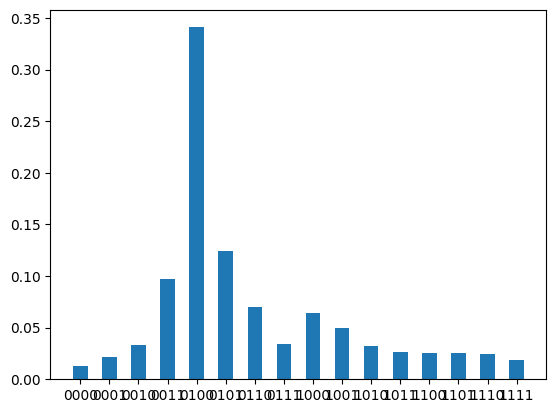



25
{'0000': 24, '0001': 18, '0010': 12, '0011': 79, '0100': 144, '0101': 292, '0110': 85, '0111': 50, '1000': 80, '1001': 36, '1010': 31, '1011': 25, '1100': 29, '1101': 27, '1110': 34, '1111': 34}
{'0000': 0.025811195000000002, '0001': 0.014541626, '0010': 0.018975258, '0011': 0.085987092, '0100': 0.160019398, '0101': 0.304962635, '0110': 0.081734658, '0111': 0.048725129, '1000': 0.071091652, '1001': 0.035964966, '1010': 0.023629188, '1011': 0.024341584, '1100': 0.025444508, '1101': 0.025444508, '1110': 0.025963784, '1111': 0.027362824}
variance :  0.005250666665307536
entropy :  2.3159920831345544


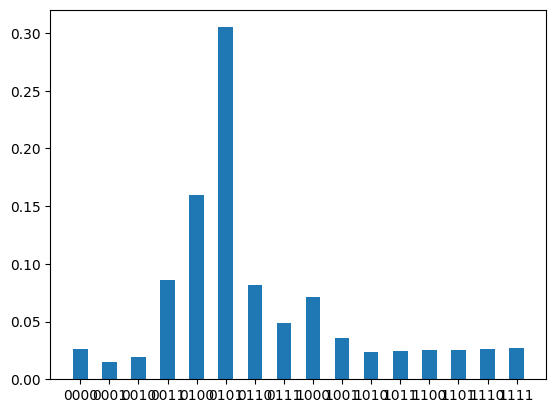



26
{'0000': 24, '0001': 17, '0010': 31, '0011': 3, '0100': 234, '0101': 297, '0110': 16, '0111': 137, '1000': 45, '1001': 25, '1010': 30, '1011': 28, '1100': 34, '1101': 21, '1110': 30, '1111': 28}
{'0000': 0.023369789000000002, '0001': 0.028228759, '0010': 0.03092289, '0011': 0.004688263, '0100': 0.227485895, '0101': 0.304962635, '0110': 0.014268159, '0111': 0.130023956, '1000': 0.05914402, '1001': 0.022277831999999997, '1010': 0.026070594, '1011': 0.03093338, '1100': 0.029339075, '1101': 0.025444508, '1110': 0.022069216000000003, '1111': 0.020771026}
variance :  0.006858788921500639
entropy :  2.162183450049568


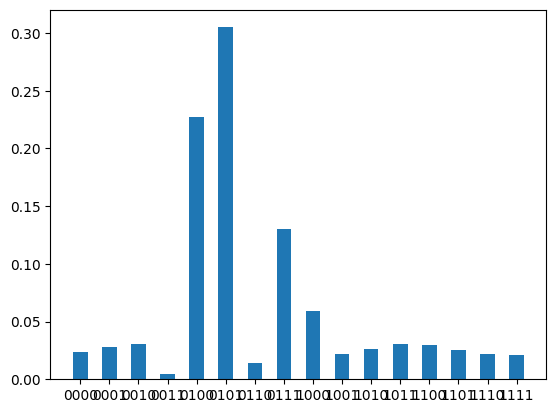



27
{'0000': 13, '0001': 18, '0010': 18, '0011': 37, '0100': 227, '0101': 213, '0110': 105, '0111': 146, '1000': 19, '1001': 40, '1010': 36, '1011': 41, '1100': 27, '1101': 23, '1110': 22, '1111': 15}
{'0000': 0.015696049, '0001': 0.015732288, '0010': 0.022648334, '0011': 0.03313303, '0100': 0.224842191, '0101': 0.220694184, '0110': 0.098536611, '0111': 0.132667661, '1000': 0.030699253, '1001': 0.030552388, '1010': 0.038567066, '1011': 0.03860712, '1100': 0.031286359, '1101': 0.025574327, '1110': 0.021939397, '1111': 0.018823743}
variance :  0.004593568428537571
entropy :  2.319968087756637


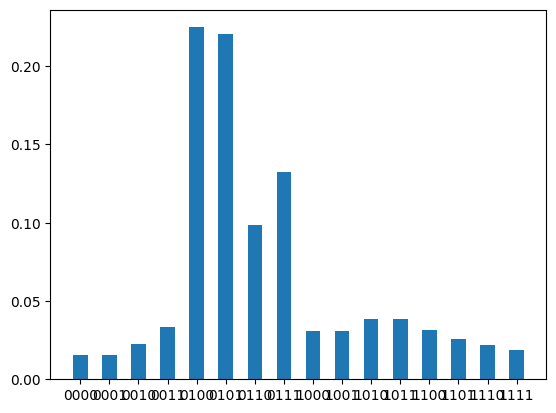



28
{'0000': 27, '0001': 14, '0010': 10, '0011': 35, '0100': 148, '0101': 242, '0110': 98, '0111': 118, '1000': 111, '1001': 24, '1010': 50, '1011': 29, '1100': 20, '1101': 27, '1110': 20, '1111': 27}
{'0000': 0.021020709999999998, '0001': 0.018032551, '0010': 0.008566378999999999, '0011': 0.039804935, '0100': 0.141570866, '0101': 0.233188271, '0110': 0.09853661, '0111': 0.12017357299999999, '1000': 0.11397057699999999, '1001': 0.023880482, '1010': 0.052649021, '1011': 0.036306858, '1100': 0.025961697, '1101': 0.022458672, '1110': 0.021939396, '1111': 0.021939396}
variance :  0.003642865226812767
entropy :  2.3816646567218913


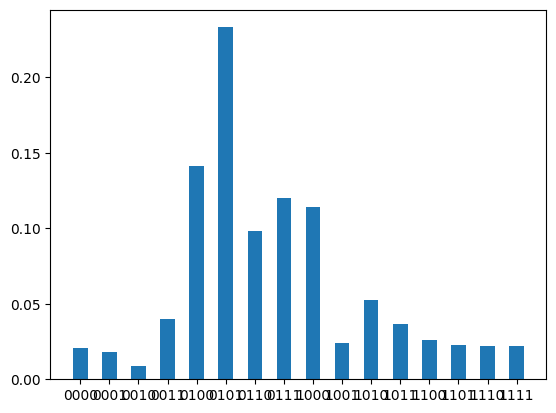



29
{'0000': 19, '0001': 25, '0010': 25, '0011': 41, '0100': 42, '0101': 327, '0110': 90, '0111': 128, '1000': 15, '1001': 122, '1010': 56, '1011': 18, '1100': 22, '1101': 18, '1110': 25, '1111': 27}
{'0000': 0.022280604, '0001': 0.023433715, '0010': 0.020943641, '0011': 0.041904449, '0100': 0.03960064, '0101': 0.333096057, '0110': 0.091853261, '0111': 0.126856923, '1000': 0.014062792000000001, '1001': 0.125850707, '1010': 0.050549507, '1011': 0.023929595999999997, '1100': 0.020560532, '1101': 0.02119878, '1110': 0.021939397, '1111': 0.021939397}
variance :  0.006174369792457215
entropy :  2.252061195500303


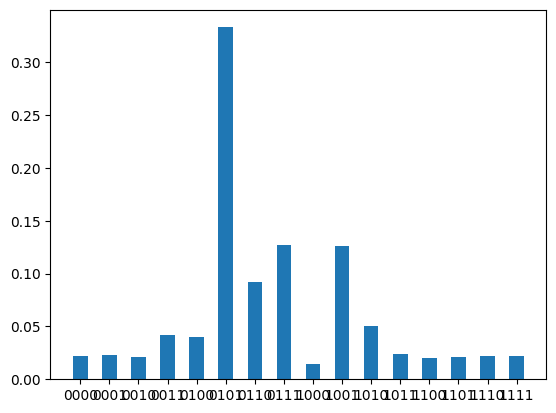



30
{'0000': 15, '0001': 14, '0010': 16, '0011': 27, '0100': 48, '0101': 322, '0110': 84, '0111': 146, '1000': 26, '1001': 127, '1010': 32, '1011': 38, '1100': 30, '1101': 22, '1110': 29, '1111': 24}
{'0000': 0.019373968, '0001': 0.01804629, '0010': 0.020432009999999997, '0011': 0.030090331999999997, '0100': 0.056966558, '0101': 0.334624916, '0110': 0.07458587, '0111': 0.126856923, '1000': 0.031330183, '1001': 0.124321848, '1010': 0.033183589, '1011': 0.035743713, '1100': 0.021072165, '1101': 0.026586204999999998, '1110': 0.024846032, '1111': 0.021939396}
variance :  0.006091528708023355
entropy :  2.2720269271792763


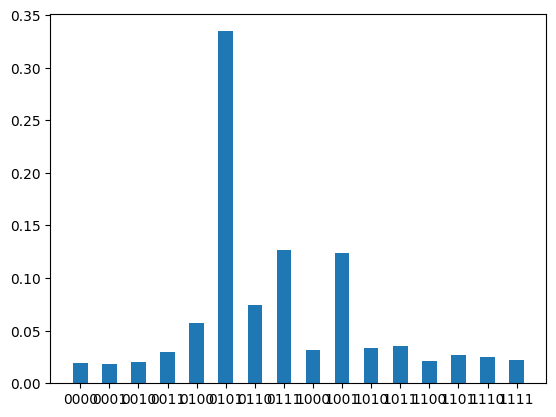



31
{'0000': 19, '0001': 15, '0010': 10, '0011': 4, '0100': 80, '0101': 217, '0110': 175, '0111': 19, '1000': 152, '1001': 40, '1010': 136, '1011': 10, '1100': 47, '1101': 31, '1110': 15, '1111': 30}
{'0000': 0.019288667, '0001': 0.016715266, '0010': 0.016376265, '0011': 0.00623501, '0100': 0.08612407, '0101': 0.2349898, '0110': 0.16512811900000002, '0111': 0.018810101, '1000': 0.139377005, '1001': 0.033779599, '1010': 0.132818706, '1011': 0.006586202, '1100': 0.044927486, '1101': 0.03064195, '1110': 0.026177057, '1111': 0.022024699}
variance :  0.0044435073998516155
entropy :  2.283070069460386


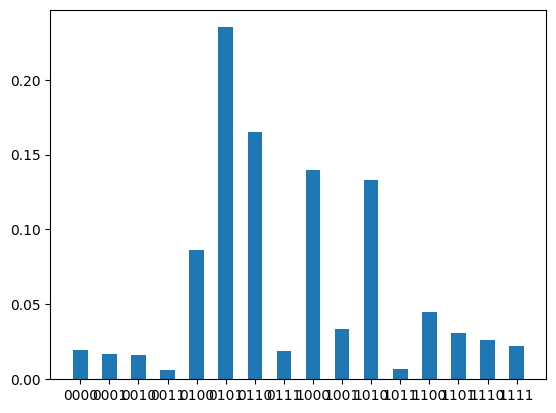



32
{'0000': 19, '0001': 20, '0010': 13, '0011': 18, '0100': 99, '0101': 113, '0110': 267, '0111': 1, '1000': 136, '1001': 60, '1010': 7, '1011': 127, '1100': 46, '1101': 31, '1110': 25, '1111': 18}
{'0000': 0.019288666, '0001': 0.019193001, '0010': 0.019957787999999997, '0011': 0.008745827, '0100': 0.084949262, '0101': 0.113428004, '0110': 0.2871188, '0111': 0.0018212579999999999, '1000': 0.139377005, '1001': 0.050768442000000004, '1010': 0.010828026000000001, '1011': 0.12814799699999999, '1100': 0.046102293, '1101': 0.028131135, '1110': 0.022595532, '1111': 0.019546963}
variance :  0.005224375115831388
entropy :  2.240831048534121


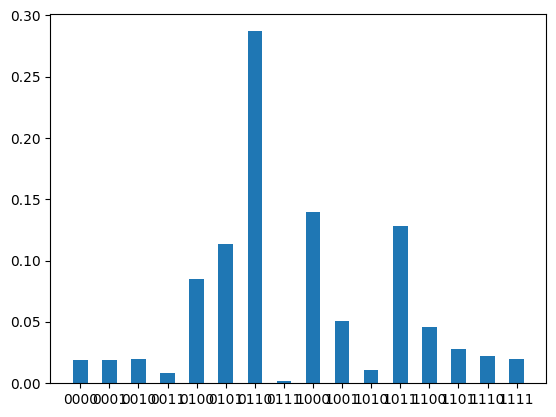



33
{'0000': 21, '0001': 15, '0010': 17, '0011': 23, '0100': 58, '0101': 101, '0110': 332, '0111': 3, '1000': 135, '1001': 67, '1010': 8, '1011': 92, '1100': 45, '1101': 42, '1110': 19, '1111': 22}
{'0000': 0.019192882, '0001': 0.019288786, '0010': 0.019597367, '0011': 0.019624859, '0100': 0.060641184, '0101': 0.10550928100000001, '0110': 0.326655045, '0111': 0.002319723, '1000': 0.118175931, '1001': 0.071969516, '1010': 0.010329559, '1011': 0.088611752, '1100': 0.054021015, '1101': 0.052439212, '1110': 0.011716500000000001, '1111': 0.019907385}
variance :  0.0058646064378727655
entropy :  2.239106836370212


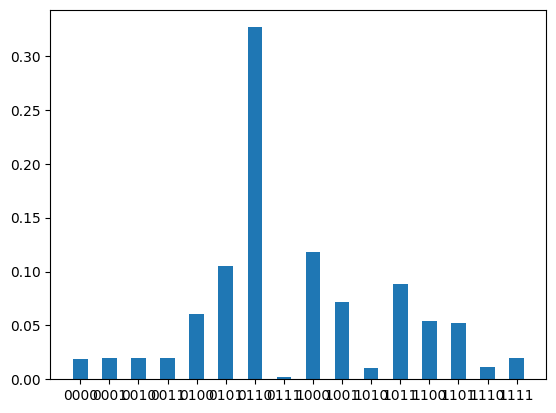



34
{'0000': 25, '0001': 18, '0010': 18, '0011': 17, '0100': 24, '0101': 173, '0110': 253, '0111': 57, '1000': 46, '1001': 68, '1010': 77, '1011': 42, '1100': 103, '1101': 3, '1110': 56, '1111': 20}
{'0000': 0.022181381, '0001': 0.019288786000000002, '0010': 0.016608868, '0011': 0.021214515, '0100': 0.020084411, '0101': 0.153215885, '0110': 0.275282383, '0111': 0.055236369, '1000': 0.051308143, '1001': 0.071969517, '1010': 0.077197347, '1011': 0.035695105, '1100': 0.10539367799999999, '1101': 0.004732609, '1110': 0.052273272999999995, '1111': 0.018317729999999997}
variance :  0.004440242873517611
entropy :  2.3398968391995765


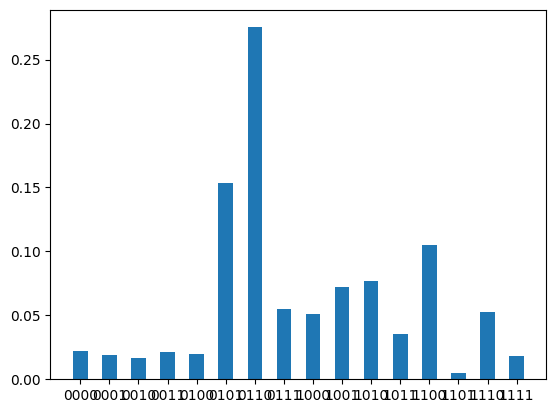



35
{'0000': 19, '0001': 23, '0010': 25, '0011': 25, '0100': 0, '0101': 171, '0110': 166, '0111': 143, '1000': 69, '1001': 32, '1010': 119, '1011': 20, '1100': 30, '1101': 95, '1110': 31, '1111': 32}
{'0000': 0.022266255000000002, '0001': 0.019389787999999998, '0010': 0.016507866, '0011': 0.021129639999999998, '0100': 0.000231325, '0101': 0.169041634, '0110': 0.174162388, '0111': 0.13395547800000002, '1000': 0.06288843, '1001': 0.037101366999999996, '1010': 0.112065495, '1011': 0.024114819, '1100': 0.026674569000000002, '1101': 0.105852604, '1110': 0.036447525, '1111': 0.038170815}
variance :  0.0030697413694354965
entropy :  2.3975593860805944


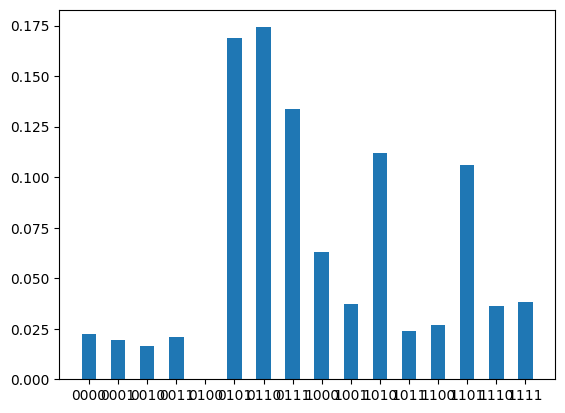



36
{'0000': 13, '0001': 11, '0010': 14, '0011': 20, '0100': 7, '0101': 132, '0110': 156, '0111': 186, '1000': 70, '1001': 44, '1010': 129, '1011': 19, '1100': 14, '1101': 53, '1110': 80, '1111': 52}
{'0000': 0.013183505, '0001': 0.020198086, '0010': 0.016507866, '0011': 0.020321342, '0100': 0.009314076000000001, '0101': 0.139187813, '0110': 0.14371800499999998, '0111': 0.182207584, '1000': 0.074585201, '1001': 0.037138144, '1010': 0.112065496, '1011': 0.024078044, '1100': 0.014977799, '1101': 0.057600499, '1110': 0.066891908, '1111': 0.068024636}
variance :  0.0028003970901106638
entropy :  2.4318584116403374


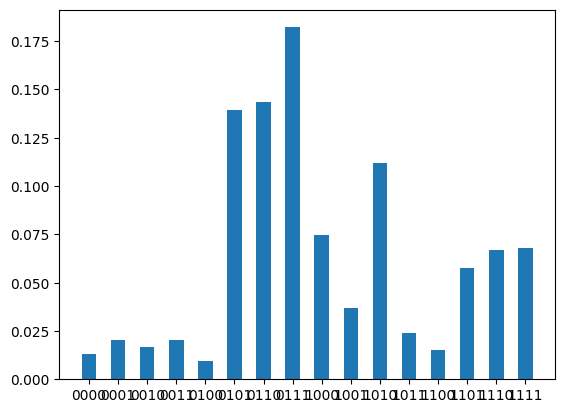



37
{'0000': 70, '0001': 2, '0010': 26, '0011': 15, '0100': 32, '0101': 59, '0110': 204, '0111': 187, '1000': 60, '1001': 36, '1010': 69, '1011': 76, '1100': 24, '1101': 57, '1110': 68, '1111': 15}
{'0000': 0.074924275, '0001': 0.006080501, '0010': 0.020149322, '0011': 0.016679885, '0100': 0.023431661, '0101': 0.07744704200000001, '0110': 0.197951912, '0111': 0.190388322, '1000': 0.070119515, '1001': 0.032096498, '1010': 0.064767153, '1011': 0.071376385, '1100': 0.020019444, '1101': 0.062066183, '1110': 0.058711171, '1111': 0.013790727000000001}
variance :  0.003058817022518181
entropy :  2.433384715565613


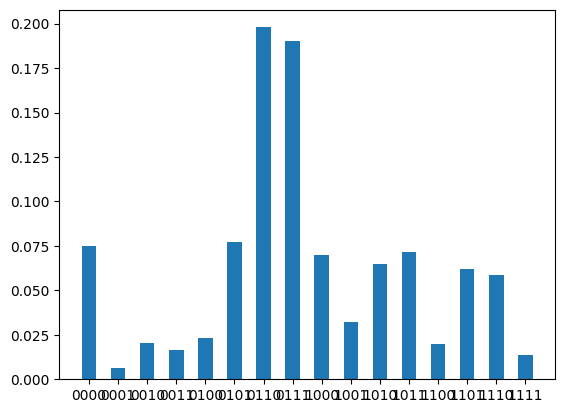



38
{'0000': 25, '0001': 60, '0010': 12, '0011': 17, '0100': 49, '0101': 17, '0110': 244, '0111': 143, '1000': 69, '1001': 76, '1010': 8, '1011': 82, '1100': 65, '1101': 10, '1110': 65, '1111': 58}
{'0000': 0.020493604999999998, '0001': 0.061975305999999994, '0010': 0.013706918, '0011': 0.016679885, '0100': 0.029874065, '0101': 0.021552237000000002, '0110': 0.25238258399999997, '0111': 0.149172902, '1000': 0.062695243, '1001': 0.084527141, '1010': 0.006404038, '1011': 0.071376385, '1100': 0.07838256, '1101': 0.00963554, '1110': 0.066135444, '1111': 0.055006147}
variance :  0.0037113050152658244
entropy :  2.3846997572311706


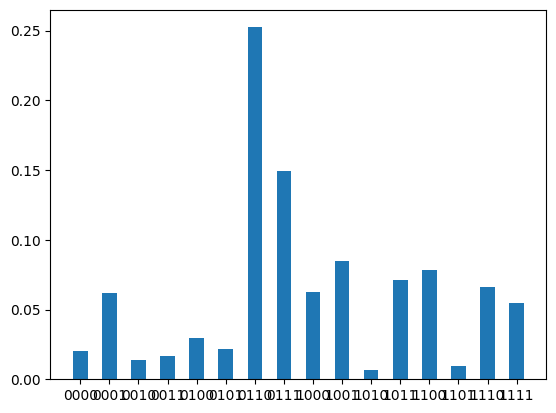



39
{'0000': 57, '0001': 66, '0010': 37, '0011': 20, '0100': 25, '0101': 0, '0110': 245, '0111': 123, '1000': 47, '1001': 152, '1010': 2, '1011': 54, '1100': 87, '1101': 14, '1110': 4, '1111': 67}
{'0000': 0.049032189, '0001': 0.062251482999999996, '0010': 0.031676673, '0011': 0.017338282, '0100': 0.029215668, '0101': 0.0035824819999999997, '0110': 0.25210640700000003, '0111': 0.120634318, '1000': 0.051390752, '1001': 0.141873565, '1010': 0.002231986, '1011': 0.067908583, '1100': 0.081850362, '1101': 0.013807592, '1110': 0.008789019, '1111': 0.066310637}
variance :  0.003925640823552329
entropy :  2.3376612773731575


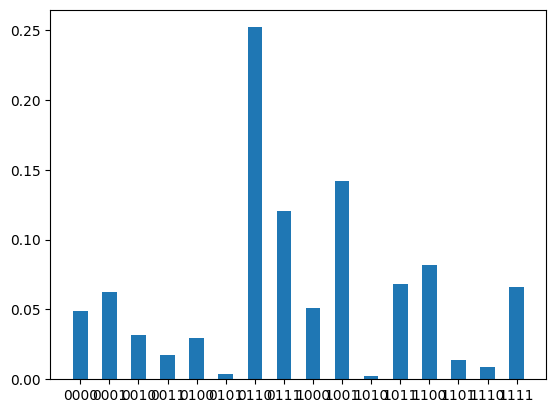



40
{'0000': 47, '0001': 16, '0010': 97, '0011': 6, '0100': 35, '0101': 7, '0110': 188, '0111': 148, '1000': 44, '1001': 144, '1010': 4, '1011': 59, '1100': 93, '1101': 36, '1110': 11, '1111': 65}
{'0000': 0.04501770000000001, '0001': 0.018728494000000002, '0010': 0.091221889, '0011': 0.005245829, '0100': 0.029215669, '0101': 0.015674935, '0110': 0.192561193, '0111': 0.164157307, '1000': 0.055405241, '1001': 0.15313541, '1010': 0.003159386, '1011': 0.052950339000000006, '1100': 0.081850362, '1101': 0.028765836, '1110': 0.00786162, '1111': 0.055048792}
variance :  0.0033316274371945364
entropy :  2.3683161783296707


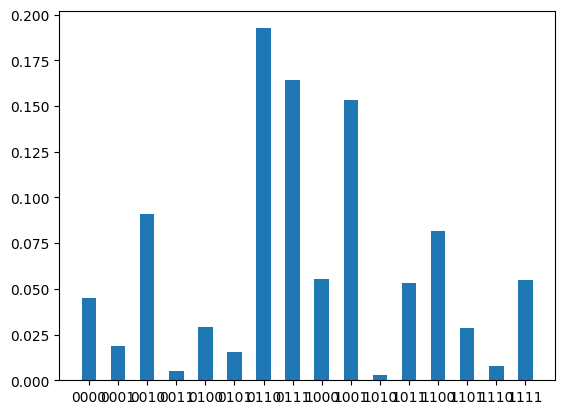



41
{'0000': 88, '0001': 22, '0010': 2, '0011': 85, '0100': 2, '0101': 62, '0110': 97, '0111': 243, '1000': 43, '1001': 112, '1010': 35, '1011': 31, '1100': 40, '1101': 81, '1110': 37, '1111': 20}
{'0000': 0.07752983399999999, '0001': 0.018108831, '0010': 0.0053457, '0011': 0.092751575, '0100': 0.00161703, '0101': 0.043273573, '0110': 0.105055447, '0111': 0.250033495, '1000': 0.056024903, '1001': 0.120623277, '1010': 0.035067391999999996, '1011': 0.027259184, '1100': 0.037963041, '1101': 0.072653156, '1110': 0.033552776, '1111': 0.023140786}
variance :  0.003496334792709653
entropy :  2.397005545888216


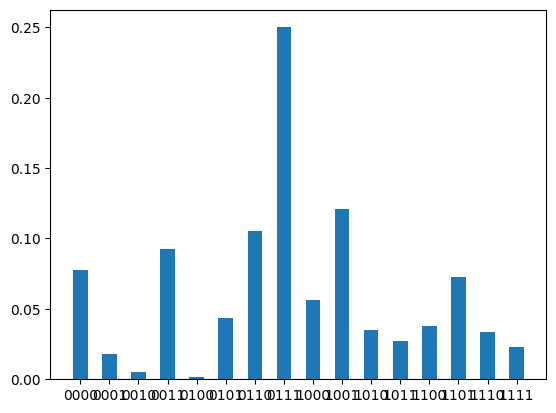



42
{'0000': 20, '0001': 87, '0010': 12, '0011': 29, '0100': 68, '0101': 47, '0110': 44, '0111': 312, '1000': 48, '1001': 61, '1010': 103, '1011': 36, '1100': 10, '1101': 52, '1110': 57, '1111': 14}
{'0000': 0.019594544000000002, '0001': 0.080198767, '0010': 0.015283739000000001, '0011': 0.033303765, '0100': 0.065072963, '0101': 0.043273572999999996, '0110': 0.041599515, '0111': 0.309481305, '1000': 0.046086864, '1001': 0.058533343, '1010': 0.093002682, '1011': 0.041641501, '1100': 0.007732307000000001, '1101': 0.072653157, '1110': 0.06378351, '1111': 0.008758468}
variance :  0.004668237082467487
entropy :  2.3718997127670765


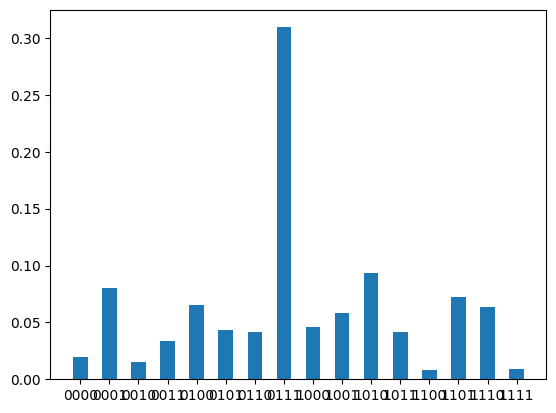



43
{'0000': 6, '0001': 32, '0010': 61, '0011': 10, '0100': 81, '0101': 69, '0110': 16, '0111': 294, '1000': 75, '1001': 12, '1010': 140, '1011': 49, '1100': 10, '1101': 76, '1110': 60, '1111': 9}
{'0000': 0.007942713, '0001': 0.03693821, '0010': 0.061921923000000004, '0011': 0.012777002999999999, '0100': 0.065864641, '0101': 0.057100798, '0110': 0.027772289, '0111': 0.308689627, '1000': 0.06661362600000001, '1001': 0.011895157, '1010': 0.136263239, '1011': 0.053293332, '1100': 0.007602298, '1101': 0.072815382, '1110': 0.063621284, '1111': 0.008888476000000001}
variance :  0.005128599975808287
entropy :  2.2993338144662276


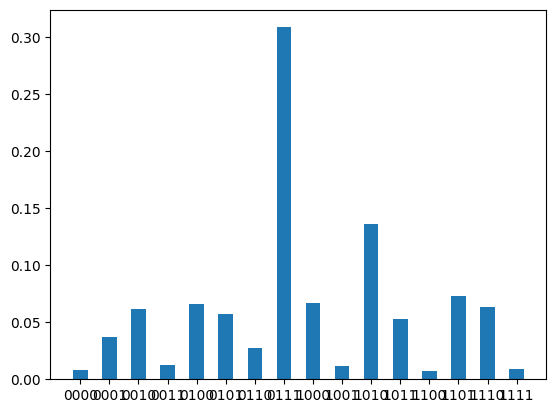



44
{'0000': 10, '0001': 43, '0010': 53, '0011': 27, '0100': 0, '0101': 130, '0110': 24, '0111': 235, '1000': 140, '1001': 1, '1010': 137, '1011': 39, '1100': 10, '1101': 43, '1110': 66, '1111': 42}
{'0000': 0.0065549760000000006, '0001': 0.040239778000000004, '0010': 0.051806630000000006, '0011': 0.023877883000000003, '0100': 0.0005538089999999999, '0101': 0.122707046, '0110': 0.027772289, '0111': 0.24308338000000002, '1000': 0.131924457, '1001': 0.000794278, '1010': 0.146378533, '1011': 0.049991762, '1100': 0.008990035, '1101': 0.043202449000000004, '1110': 0.063621285, '1111': 0.038501411}
variance :  0.004133892896541926
entropy :  2.292391501465654


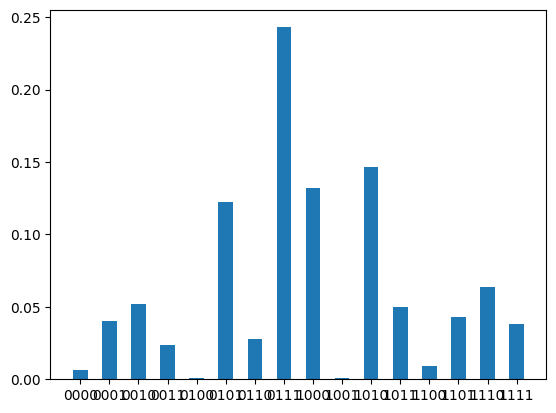



45
{'0000': 42, '0001': 10, '0010': 48, '0011': 51, '0100': 0, '0101': 0, '0110': 161, '0111': 131, '1000': 240, '1001': 0, '1010': 98, '1011': 60, '1100': 34, '1101': 10, '1110': 32, '1111': 83}
{'0000': 0.03946784, '0001': 0.007332786, '0010': 0.050753137000000004, '0011': 0.05782716, '0100': 0.000565017, '0101': 0.00014879999999999998, '0110': 0.136789226, '0111': 0.134066444, '1000': 0.254482702, '1001': 0.0007830700000000001, '1010': 0.112429255, '1011': 0.051045255, '1100': 0.041897028, '1101': 0.010289585, '1110': 0.032929567, '1111': 0.069193127}
variance :  0.004341130171012167
entropy :  2.2554240466780606


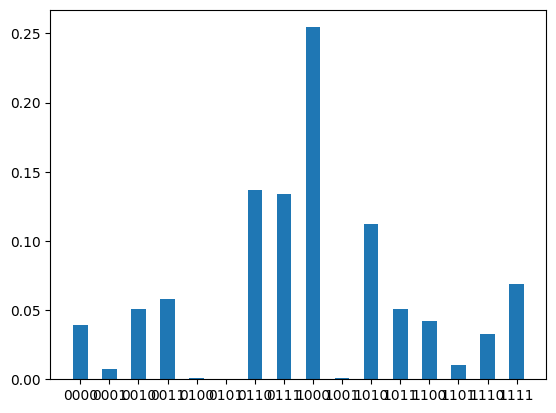



46
{'0000': 45, '0001': 9, '0010': 5, '0011': 50, '0100': 58, '0101': 0, '0110': 93, '0111': 151, '1000': 271, '1001': 0, '1010': 53, '1011': 76, '1100': 87, '1101': 11, '1110': 26, '1111': 65}
{'0000': 0.05016571, '0001': 0.008630043, '0010': 0.0048926609999999995, '0011': 0.050053832000000006, '0100': 0.057583679, '0101': 0.000427078, '0110': 0.110242282, '0111': 0.134066444, '1000': 0.281029644, '1001': 0.000504792, '1010': 0.055410594, '1011': 0.058818583, '1100': 0.087757504, '1101': 0.008992326, '1110': 0.022231699, '1111': 0.069193127}
variance :  0.00466473057291579
entropy :  2.2600436079959585


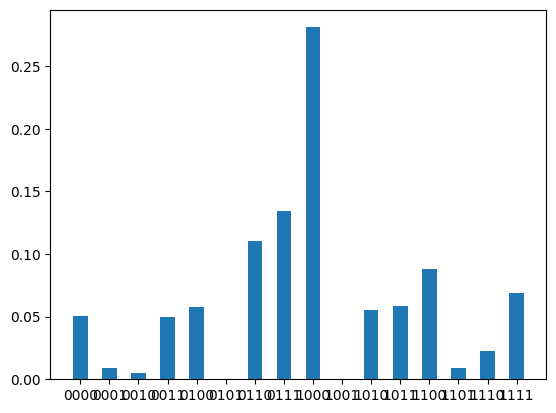



47
{'0000': 53, '0001': 10, '0010': 4, '0011': 29, '0100': 43, '0101': 31, '0110': 50, '0111': 60, '1000': 356, '1001': 71, '1010': 24, '1011': 68, '1100': 106, '1101': 5, '1110': 15, '1111': 75}
{'0000': 0.053950144, '0001': 0.010370754, '0010': 0.004579247999999999, '0011': 0.030096299, '0100': 0.045732758, '0101': 0.032548944999999996, '0110': 0.052102576, '0111': 0.071744416, '1000': 0.343351673, '1001': 0.058644498999999996, '1010': 0.023288727999999998, '1011': 0.070669504, '1100': 0.107715036, '1101': 0.00930574, '1110': 0.020490987999999998, '1111': 0.065408693}
variance :  0.005981948847109115
entropy :  2.280298673527512


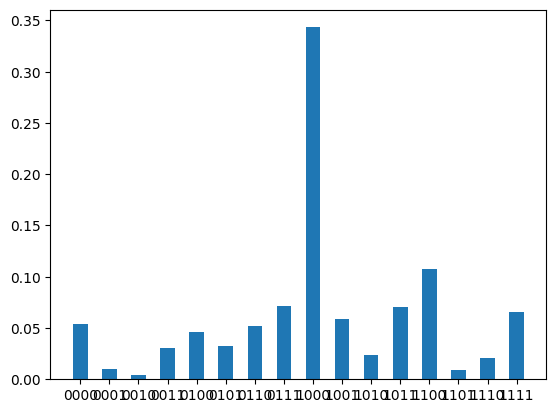



48
{'0000': 66, '0001': 46, '0010': 12, '0011': 26, '0100': 70, '0101': 13, '0110': 40, '0111': 99, '1000': 324, '1001': 27, '1010': 32, '1011': 81, '1100': 107, '1101': 16, '1110': 12, '1111': 29}
{'0000': 0.053950143000000006, '0001': 0.044668648000000005, '0010': 0.010874337999999999, '0011': 0.021211274, '0100': 0.057297845, '0101': 0.019840817, '0110': 0.040703082, '0111': 0.08819524200000001, '1000': 0.343351673, '1001': 0.042193673, '1010': 0.034688222000000005, '1011': 0.08337763, '1100': 0.09614995, '1101': 0.018190765, '1110': 0.014195897, '1111': 0.031110798000000002}
variance :  0.005916051239394105
entropy :  2.3041165062948084


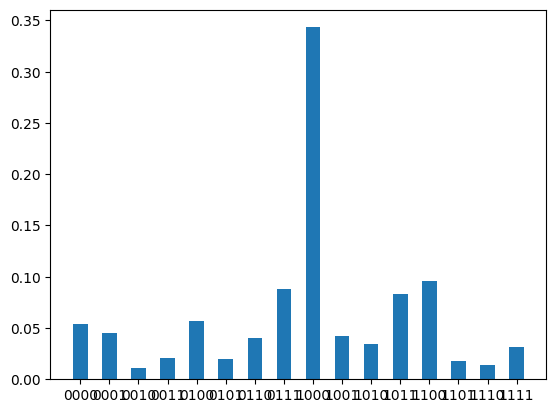



49
{'0000': 44, '0001': 57, '0010': 40, '0011': 1, '0100': 29, '0101': 51, '0110': 51, '0111': 81, '1000': 129, '1001': 264, '1010': 34, '1011': 81, '1100': 45, '1101': 51, '1110': 40, '1111': 2}
{'0000': 0.035302915, '0001': 0.06331587699999999, '0010': 0.039156215, '0011': 0.004836594, '0100': 0.023355265, '0101': 0.06000608, '0110': 0.050855081, '0111': 0.084908792, '1000': 0.125244078, '1001': 0.260301267, '1010': 0.037974671, '1011': 0.073225631, '1100': 0.055984688, '1101': 0.052133346000000004, '1110': 0.030570579, '1111': 0.002828922}
variance :  0.0034559605965311267
entropy :  2.427658799906262


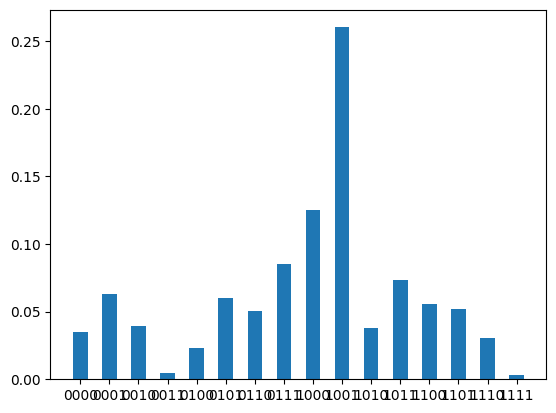

In [25]:
var_notcontainingCL = []
entropy_notcontainingCL = []
for N in range(50):
  coin_bit = QuantumRegister(1, 's')
  position_bits = QuantumRegister(4, 'p')
  classical_bis = ClassicalRegister(4, 'c')
  circuit = QuantumCircuit(coin_bit, position_bits, classical_bis)

  s = coin_bit
  p0, p1, p2, p3 = position_bits
  c0, c1, c2, c3 = classical_bis

  Ugate = Shift.to_gate().control(1)

  for i in range(N):
    circuit.barrier()
    circuit.h(s)
    circuit.append(Ugate, [s, p0, p1, p2, p3])

  circuit.barrier()

  circuit.measure([p0, p1, p2, p3], [c0, c1, c2, c3])

  circuit_basis = transpile(circuit, qpu_backend)

  job = qpu_backend.run(circuit_basis, shots=1000)
  print(N)
  print(job.get_counts())
  print(job.get_probabilities())

  board = ['0000','0001','0010','0011','0100','0101','0110','0111','1000','1001','1010','1011','1100','1101','1110','1111']
  prob = []
  for i in board:
    prob.append(dict(job.get_probabilities()).get(i, 0))

  entropy = 0
  for i in range(16):
    if prob[i] != 0 :
      entropy = entropy - prob[i]*np.log(prob[i])

  var_notcontainingCL.append(np.var(prob))
  entropy_notcontainingCL.append(entropy)
  print("variance : ", np.var(prob))
  print("entropy : ", entropy)
  plt.bar(board, prob, 0.5)
  plt.xticks(board)
  plt.show()
  print()
  print()

#4. Adding Chutes and Ladders in Board

1) Chutes & Ladder Operator (Notated CL)

Chutes & Ladder Operator

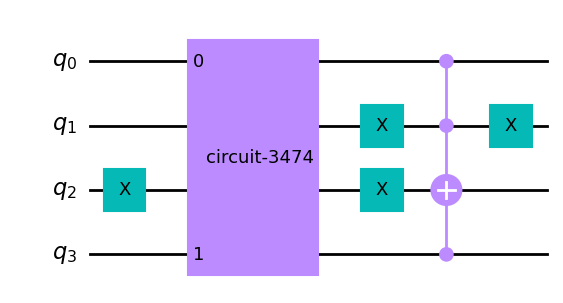

In [26]:
CL = QuantumCircuit(4)

qc1 = QuantumCircuit(2)
qc1.swap(0,1)
Ugate = qc1.to_gate().control(2)

CL.x(2)
CL.append(Ugate, [1,2,0,3])
CL.x(2)
CL.x(1)
CL.append(C3XGate(), [0,1,3,2])
CL.x(1)

CL.draw("mpl")

Verifying Chutes & Ladder Operator (3 <-> 10)

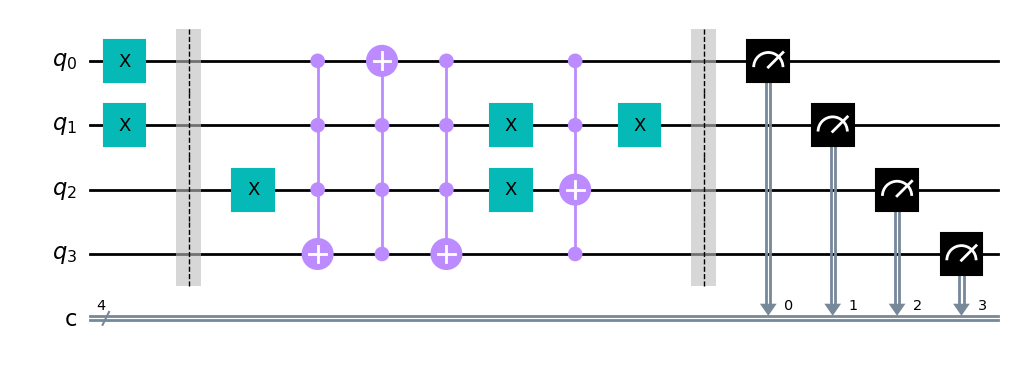

In [27]:
q_reg = QuantumRegister(4, 'q')
c_reg = ClassicalRegister(4, 'c')
CL = QuantumCircuit(q_reg, c_reg)

qc1 = QuantumCircuit(2)
qc1.swap(0,1)
Ugate = qc1.to_gate().control(2)

CL.x(0)
CL.x(1)

CL.barrier()
CL.x(2)
CL.append(Ugate, [1,2,0,3])
CL.x(2)
CL.x(1)
CL.append(C3XGate(), [0,1,3,2])
CL.x(1)
CL.barrier()

CL.measure(q_reg, c_reg)

CL_basis = transpile(CL, qpu_backend)
CL_basis.draw("mpl")

{'1010': 10000}
{'1010': 1.0}


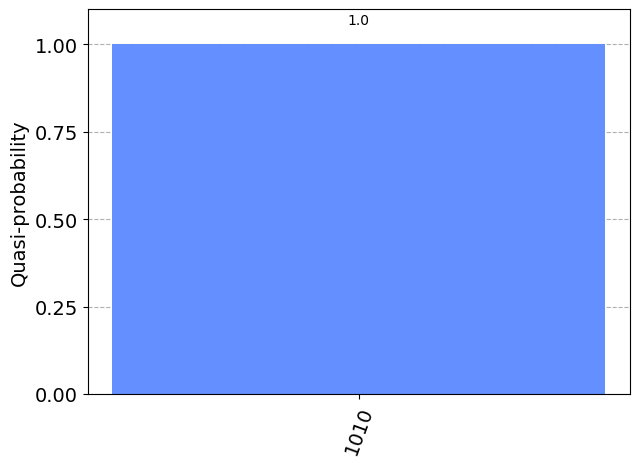

In [28]:
# Run the circuit on IonQ's platform:
job = qpu_backend.run(CL_basis, shots=10000)
print(job.get_counts())

print(job.get_probabilities())
plot_histogram(job.get_probabilities(), sort='asc')

Verifying Chutes & Ladder Operator (9 <-> 13)

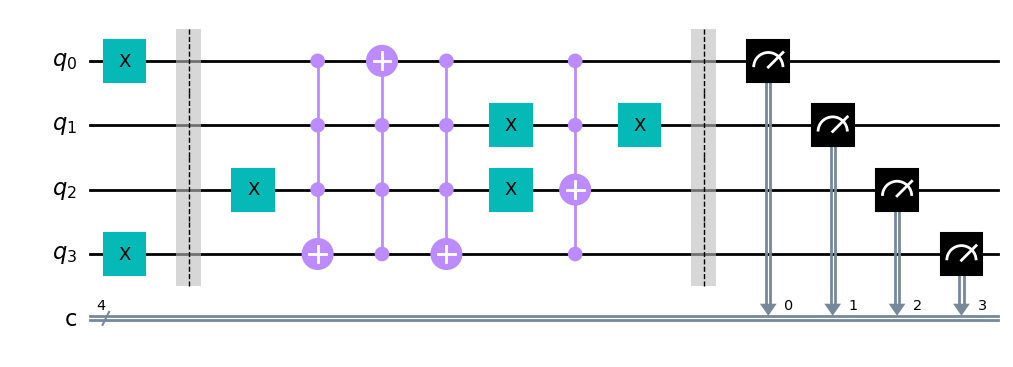

In [29]:
q_reg = QuantumRegister(4, 'q')
c_reg = ClassicalRegister(4, 'c')
CL = QuantumCircuit(q_reg, c_reg)

qc1 = QuantumCircuit(2)
qc1.swap(0,1)
Ugate = qc1.to_gate().control(2)

CL.x(0)
CL.x(3)

CL.barrier()
CL.x(2)
CL.append(Ugate, [1,2,0,3])
CL.x(2)
CL.x(1)
CL.append(C3XGate(), [0,1,3,2])
CL.x(1)
CL.barrier()

CL.measure(q_reg, c_reg)

CL_basis = transpile(CL, qpu_backend)
CL_basis.draw("mpl")

{'1101': 10000}
{'1101': 1.0}


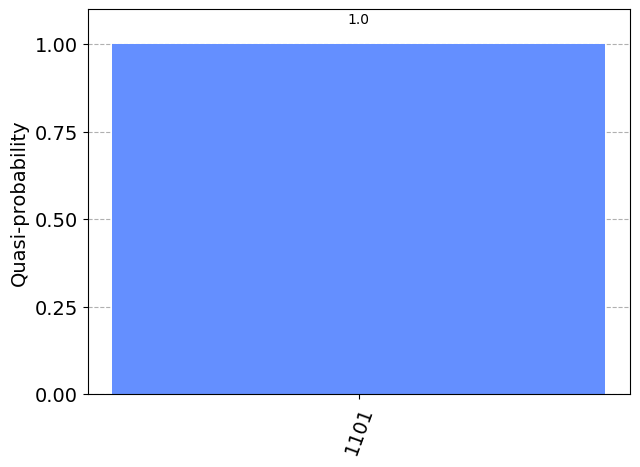

In [30]:
# Run the circuit on IonQ's platform:
job = qpu_backend.run(CL_basis, shots=10000)
print(job.get_counts())

print(job.get_probabilities())
plot_histogram(job.get_probabilities(), sort='asc')

Verifying Chutes & Ladder Operator (7 <-> 7)

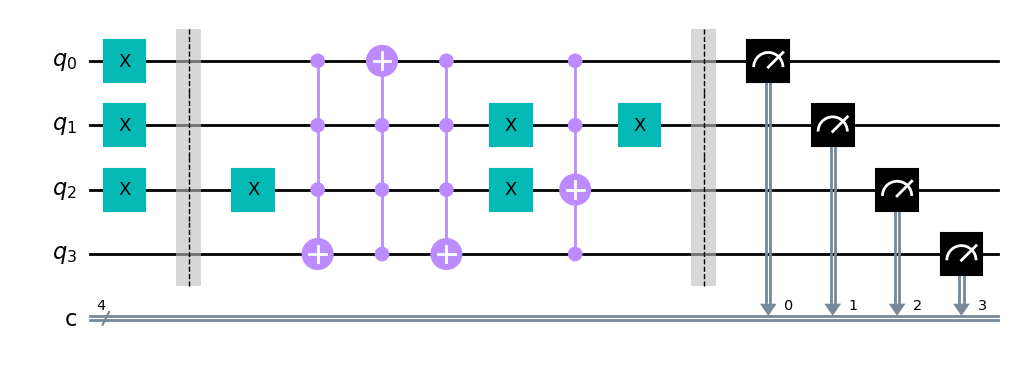

In [31]:
q_reg = QuantumRegister(4, 'q')
c_reg = ClassicalRegister(4, 'c')
CL = QuantumCircuit(q_reg, c_reg)

qc1 = QuantumCircuit(2)
qc1.swap(0,1)
Ugate = qc1.to_gate().control(2)

CL.x(0)
CL.x(1)
CL.x(2)

CL.barrier()
CL.x(2)
CL.append(Ugate, [1,2,0,3])
CL.x(2)
CL.x(1)
CL.append(C3XGate(), [0,1,3,2])
CL.x(1)
CL.barrier()

CL.measure(q_reg, c_reg)

CL_basis = transpile(CL, qpu_backend)
CL_basis.draw("mpl")

{'0111': 10000}
{'0111': 1.0}


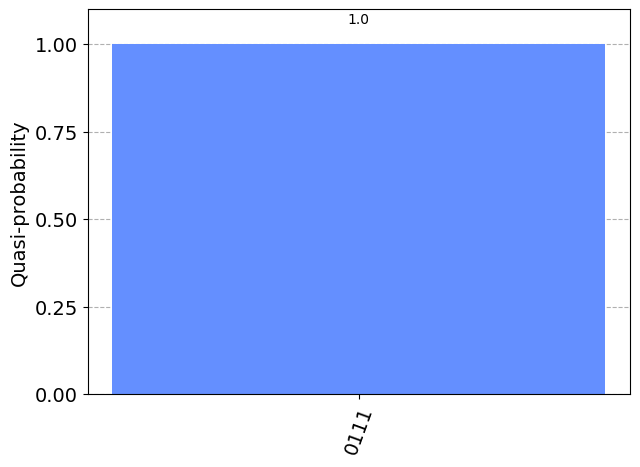

In [32]:
# Run the circuit on IonQ's platform:
job = qpu_backend.run(CL_basis, shots=10000)
print(job.get_counts())

print(job.get_probabilities())
plot_histogram(job.get_probabilities(), sort='asc')

2) Chutes & Ladders Board Evolution Operator

Chutes & Ladder Operator

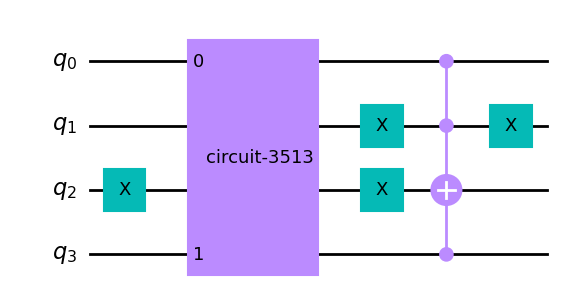

In [33]:
CL = QuantumCircuit(4)

qc1 = QuantumCircuit(2)
qc1.swap(0,1)
Ugate = qc1.to_gate().control(2)

CL.x(2)
CL.append(Ugate, [1,2,0,3])
CL.x(2)
CL.x(1)
CL.append(C3XGate(), [0,1,3,2])
CL.x(1)

CL.draw("mpl")

1 Step Chutes & Ladders Board Evolution Operator

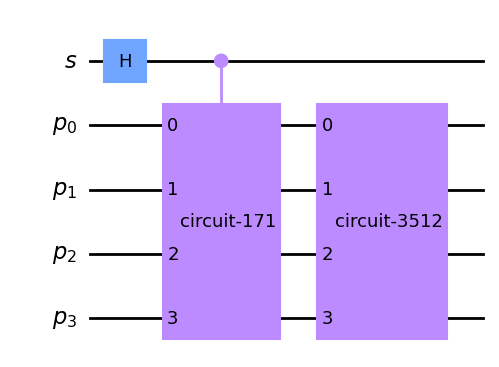

In [34]:
coin_bit = QuantumRegister(1, 's')
position_bits = QuantumRegister(4, 'p')
circuit = QuantumCircuit(coin_bit, position_bits)

s = coin_bit
p0, p1, p2, p3 = position_bits

Ugate = Shift.to_gate().control(1)
circuit.h(s)
circuit.append(Ugate, [s, p0, p1, p2, p3])
circuit.append(CL, [p0, p1, p2, p3])

circuit.draw("mpl")

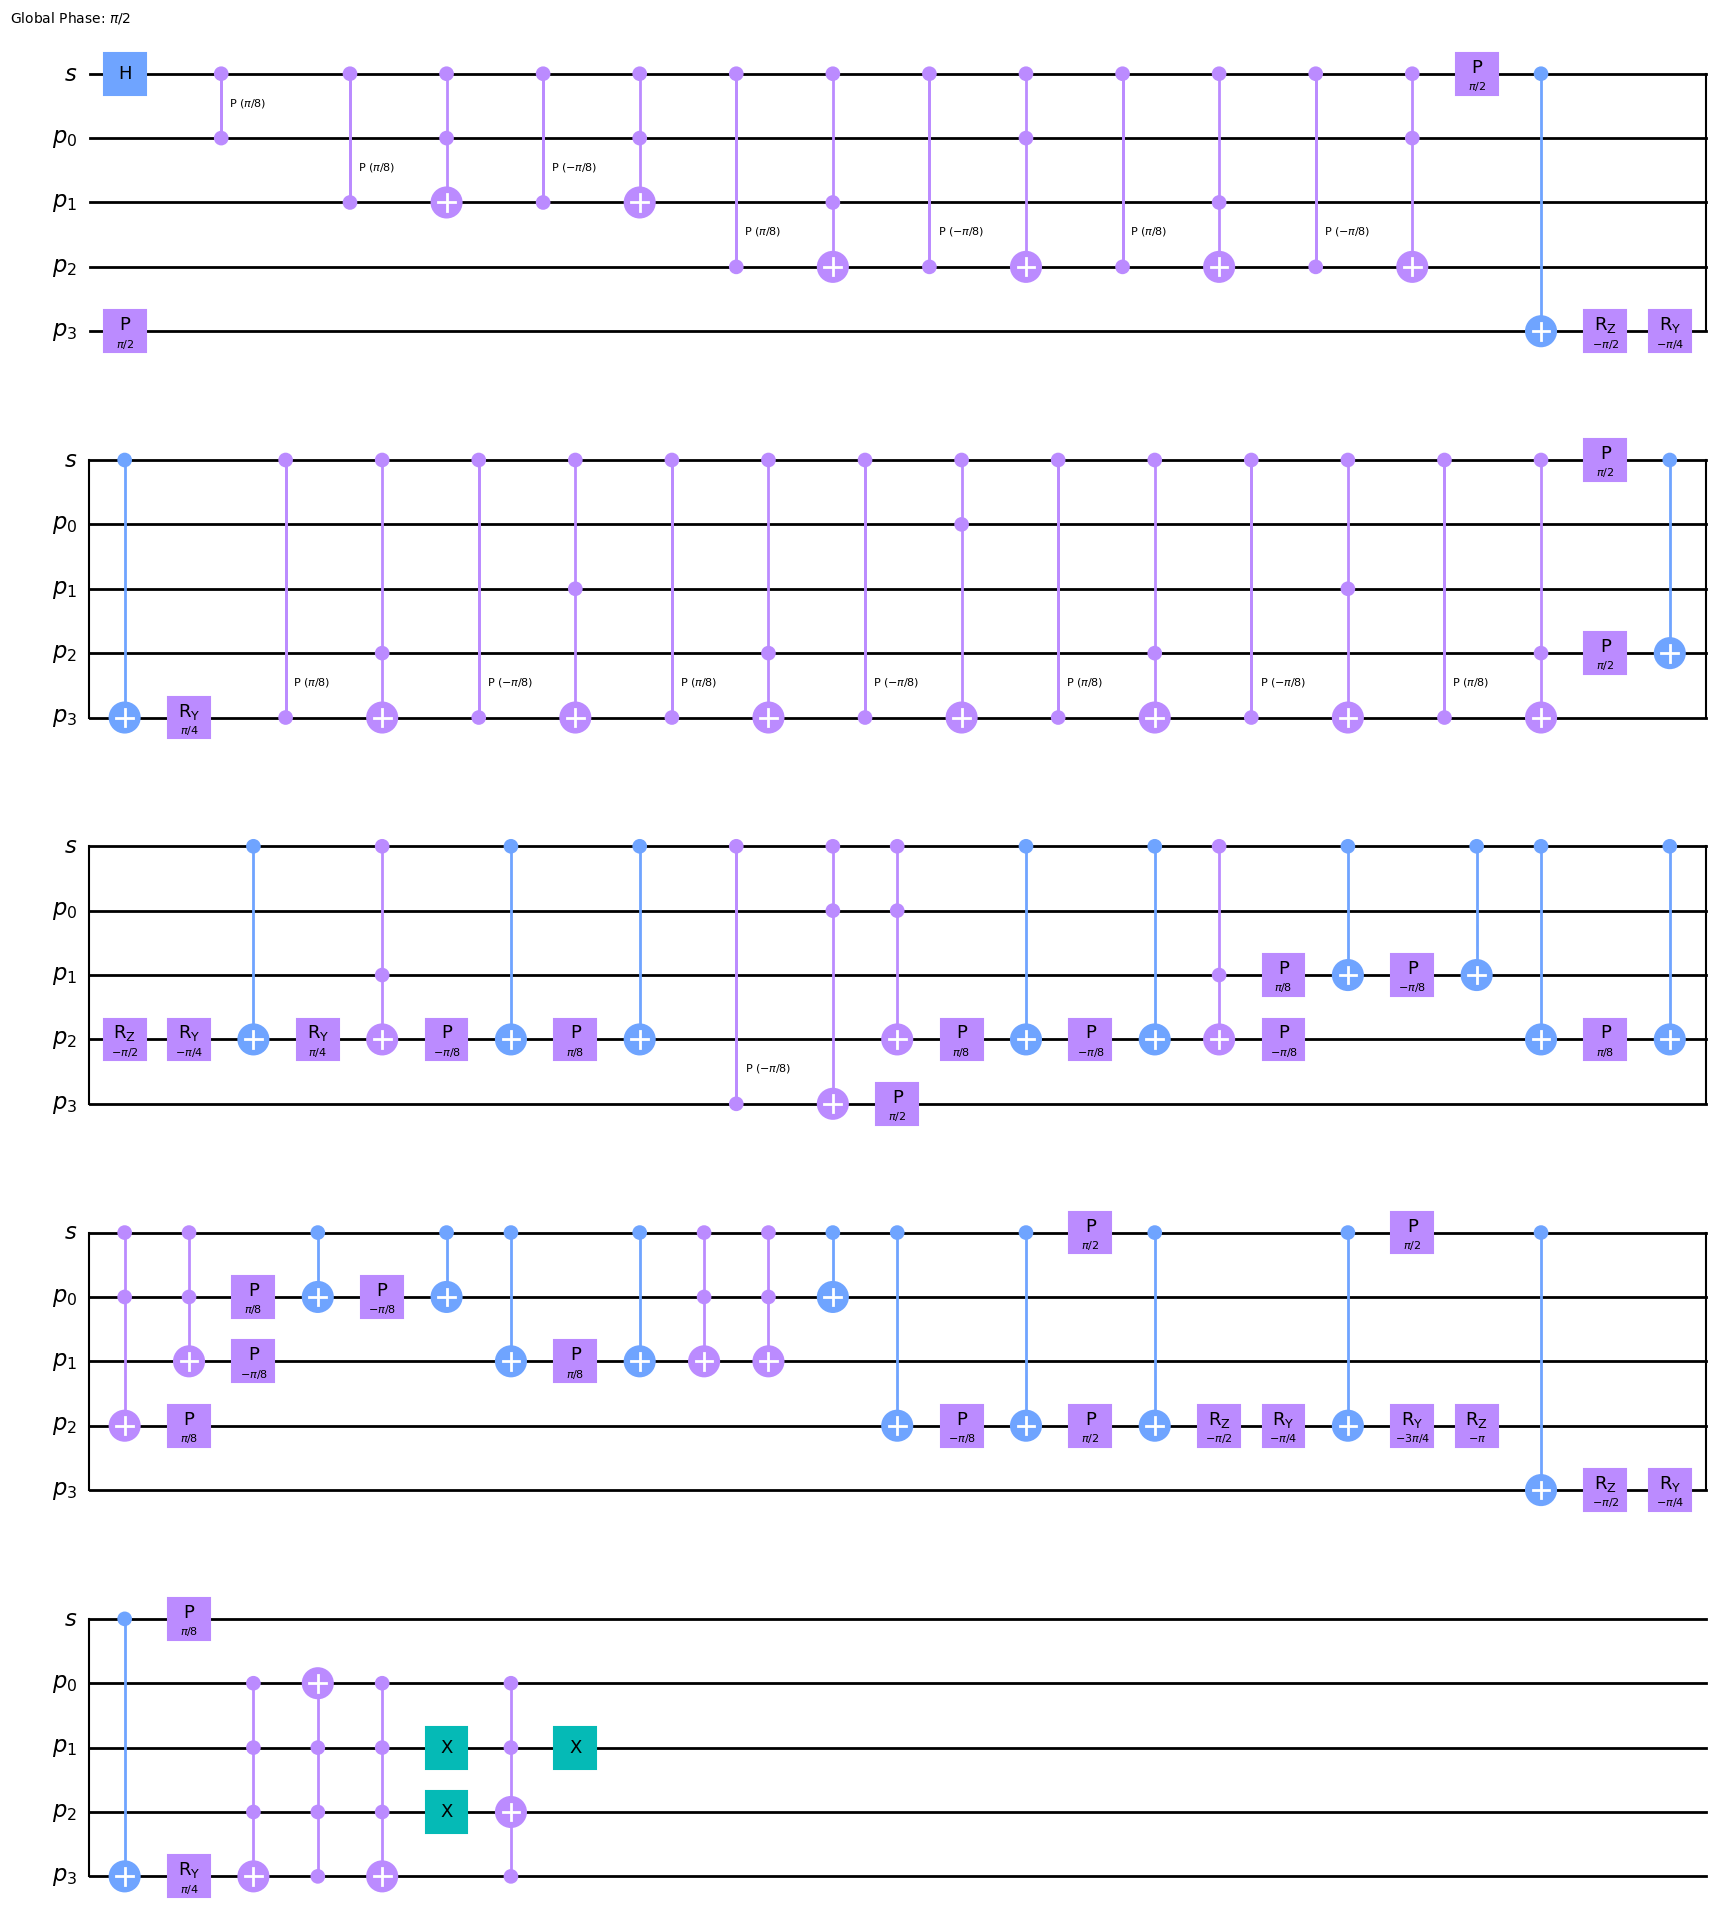

In [35]:
coin_bit = QuantumRegister(1, 's')
position_bits = QuantumRegister(4, 'p')
circuit = QuantumCircuit(coin_bit, position_bits)

s = coin_bit
p0, p1, p2, p3 = position_bits

Ugate = Shift.to_gate().control(1)
circuit.h(s)
circuit.append(Ugate, [s, p0, p1, p2, p3])
circuit.append(CL, [p0, p1, p2, p3])

circuit_basis = transpile(circuit, qpu_backend)
circuit_basis.draw("mpl")

#5. Discussion

1) Role of Measurement in Quantum Chutes and Ladders Game

State measurement makes wave function collapse. Collapse of wave function arises randomness of Quantum Chutes and Ladders Game.

2) Measurement between Turns

Repetition of measurement and initializaing states is just repetition of 1 step evolution. Repetition of measurement can obtain probability of each state after 1 step evolution.

3) No Measurement between Turns

No measurement makes unitary evolution by each step. This procedure can obtain quantum superposition of states.

4) Quantum Analog of the "Memoryless" Nature of the Classical Game?

Quantum walks are quantum analogues of classical random walks.

Classical Walk : Walker occupy definite states and randomness arises from stocastic transitions defined by Markov's Process.

Quantum Walk : Randomness arises through quantum superposition of states, non-random, reversible unitary evolution and collapse of the wave function due to state measurements.

#6. Compare between #3 & #4 (10 Step)

1) Task 3 (Not Containing Chutes & Ladders)

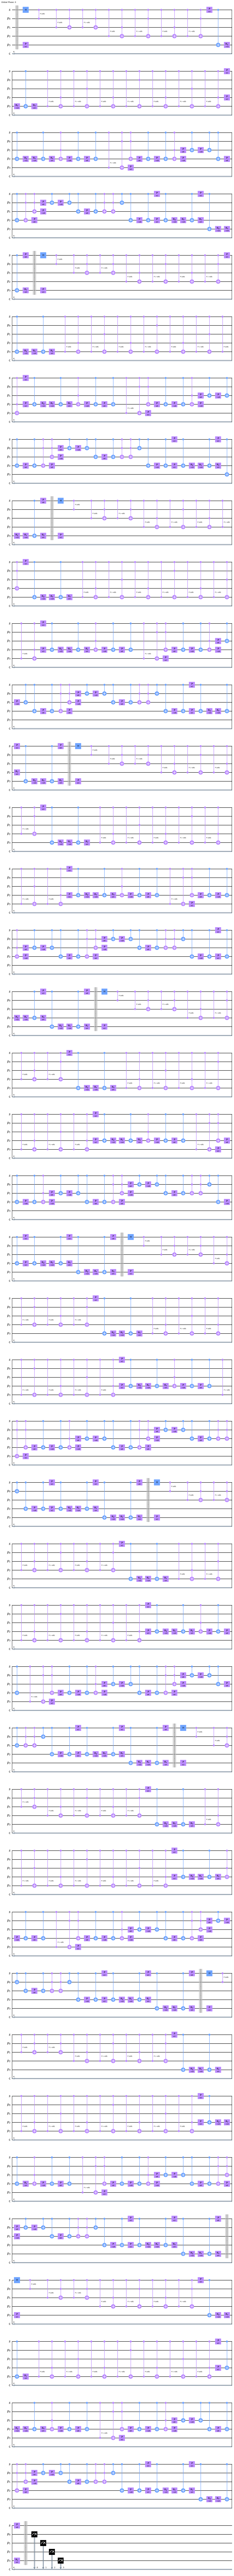

In [36]:
N = 10

coin_bit = QuantumRegister(1, 's')
position_bits = QuantumRegister(4, 'p')
classical_bits = ClassicalRegister(4, 'c')
circuit = QuantumCircuit(coin_bit, position_bits, classical_bits)

s = coin_bit
p0, p1, p2, p3 = position_bits
c0, c1, c2, c3 = classical_bits

Ugate = Shift.to_gate().control(1)

for i in range(N):
  circuit.barrier()
  circuit.h(s)
  circuit.append(Ugate, [s, p0, p1, p2, p3])

circuit.barrier()

circuit.measure([p0, p1, p2, p3], [c0, c1, c2, c3])

circuit_basis = transpile(circuit, qpu_backend)
circuit_basis.draw("mpl")

{'0000': 11, '0001': 817, '0010': 4415, '0011': 655, '0100': 1015, '0101': 662, '0110': 523, '0111': 581, '1000': 839, '1001': 471, '1010': 11}
{'0000': 0.000976562, '0001': 0.080078124, '0010': 0.438476562, '0011': 0.0625, '0100': 0.09765625, '0101': 0.0703125, '0110': 0.05078125, '0111': 0.0625, '1000': 0.086914062, '1001': 0.048828124, '1010': 0.000976563}


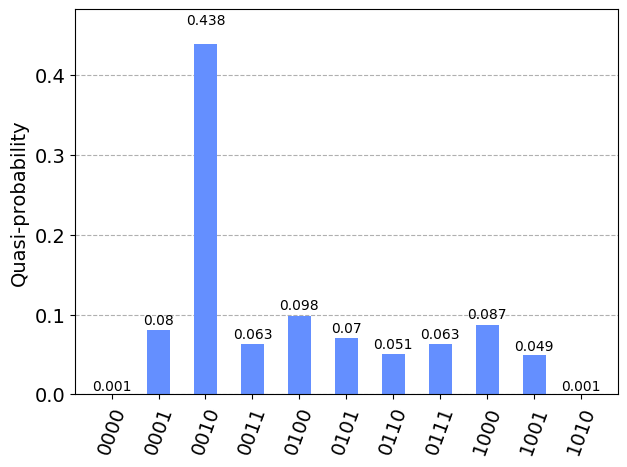

In [37]:
# Run the circuit on IonQ's platform:
job = qpu_backend.run(circuit_basis, shots=10000)
print(job.get_counts())

print(job.get_probabilities())
plot_histogram(job.get_probabilities(), sort='asc')

2) Task 4 (Not Containing Chutes & Ladders)

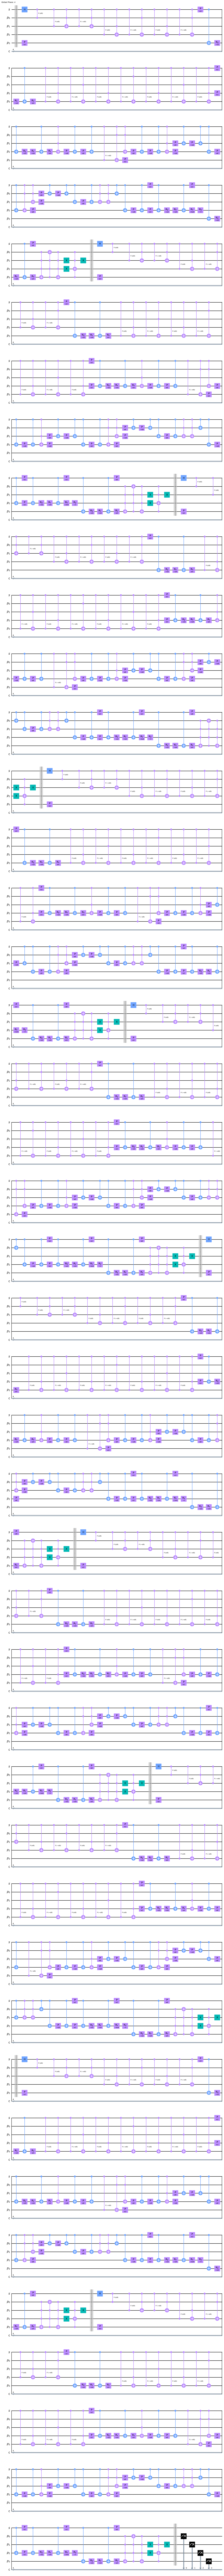

In [38]:
N = 10

coin_bit = QuantumRegister(1, 's')
position_bits = QuantumRegister(4, 'p')
classical_bits = ClassicalRegister(4, 'c')
circuit = QuantumCircuit(coin_bit, position_bits, classical_bits)

s = coin_bit
p0, p1, p2, p3 = position_bits
c0, c1, c2, c3 = classical_bits

Ugate = Shift.to_gate().control(1)

for i in range(N):
  circuit.barrier()
  circuit.h(s)
  circuit.append(Ugate, [s, p0, p1, p2, p3])

  qc1 = QuantumCircuit(2)
  qc1.swap(0,1)
  CSwapgate = qc1.to_gate().control(2)

  circuit.x(p2)
  circuit.append(CSwapgate, [p1,p2,p0,p3])
  circuit.x(p2)
  circuit.x(p1)
  circuit.append(C3XGate(), [p0,p1,p3,p2])
  circuit.x(p1)

circuit.barrier()

circuit.measure([p0, p1, p2, p3], [c0, c1, c2, c3])

circuit_basis = transpile(circuit, qpu_backend)
circuit_basis.draw("mpl")

{'0000': 28, '0001': 771, '0010': 4416, '0011': 771, '0100': 213, '0101': 592, '0110': 48, '0111': 122, '1000': 254, '1001': 395, '1010': 753, '1011': 795, '1100': 525, '1101': 101, '1110': 51, '1111': 165}
{'0000': 0.001953125, '0001': 0.080078124, '0010': 0.438476562, '0011': 0.080078124, '0100': 0.01953125, '0101': 0.059570312, '0110': 0.004882812, '0111': 0.012695312, '1000': 0.025390624, '1001': 0.036132813, '1010': 0.078125, '1011': 0.080078124, '1100': 0.051757812, '1101': 0.009765624, '1110': 0.004882812, '1111': 0.016601562}


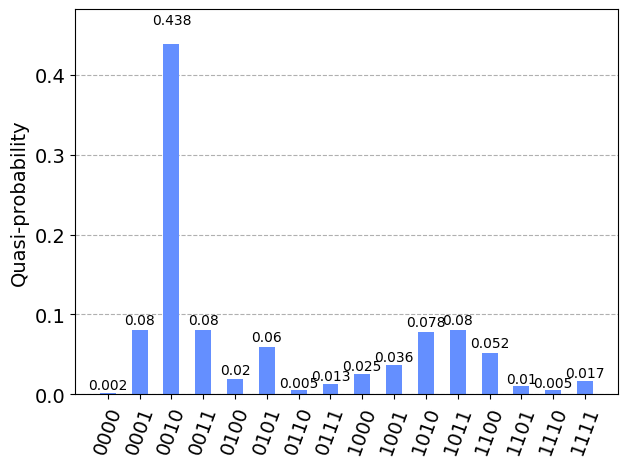

In [39]:
# Run the circuit on IonQ's platform:
job = qpu_backend.run(circuit_basis, shots=10000)
print(job.get_counts())

print(job.get_probabilities())
plot_histogram(job.get_probabilities(), sort='asc')

3) N Step Board Operator Containing Chutes & Ladders

0
{'0000': 1000}
{'0000': 1.0}
variance :  0.05859375
entropy :  0.0


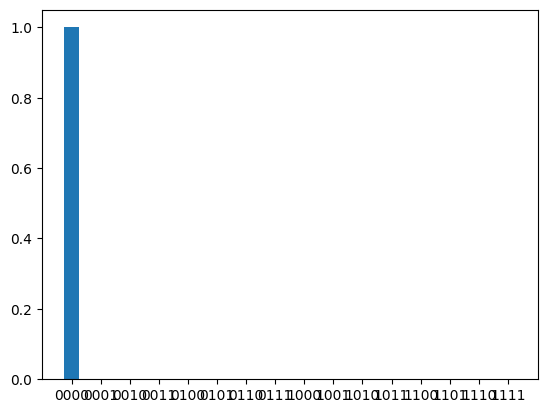



1
{'0000': 474, '0001': 526}
{'0000': 0.5, '0001': 0.5}
variance :  0.02734375
entropy :  0.6931471805599453


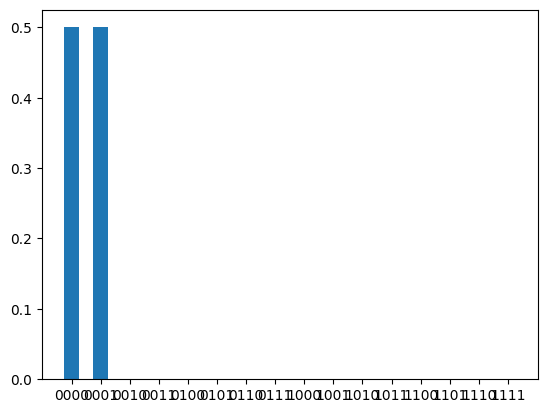



2
{'0000': 251, '0001': 512, '0010': 237}
{'0000': 0.25, '0001': 0.5, '0010': 0.25}
variance :  0.01953125
entropy :  1.0397207708399179


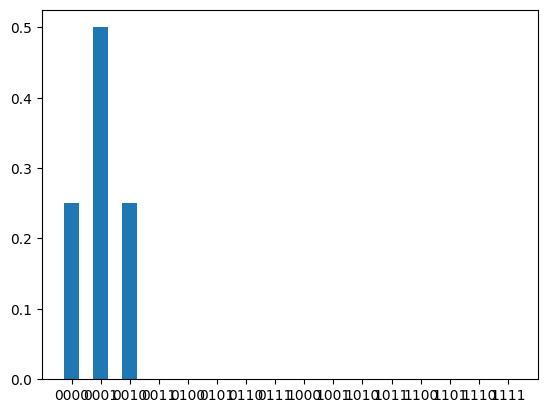



3
{'0000': 125, '0001': 631, '0010': 119, '1010': 125}
{'0000': 0.125, '0001': 0.625, '0010': 0.125, '1010': 0.125}
variance :  0.0234375
entropy :  1.0735428464085233


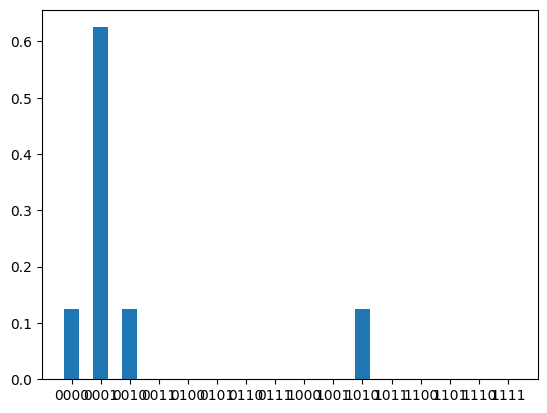



4
{'0000': 49, '0001': 631, '0010': 134, '0011': 72, '1010': 63, '1011': 51}
{'0000': 0.0625, '0001': 0.625, '0010': 0.125, '0011': 0.0625, '1010': 0.0625, '1011': 0.0625}
variance :  0.0224609375
entropy :  1.2468296415485096


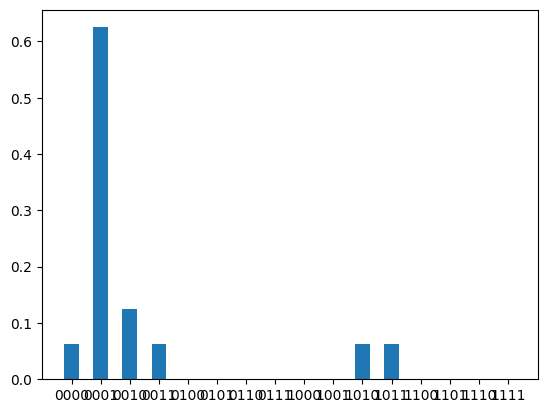



5
{'0000': 20, '0001': 533, '0010': 132, '0011': 25, '0100': 33, '1010': 157, '1011': 66, '1100': 34}
{'0000': 0.03125, '0001': 0.53125, '0010': 0.125, '0011': 0.03125, '0100': 0.03125, '1010': 0.15625, '1011': 0.0625, '1100': 0.03125}
variance :  0.0167236328125
entropy :  1.4925081460270506


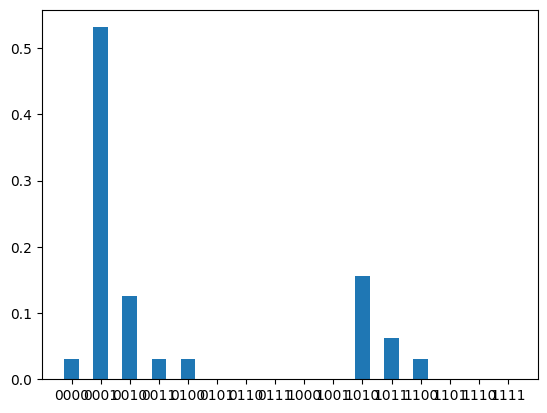



6
{'0000': 14, '0001': 403, '0010': 216, '0011': 15, '0100': 28, '0101': 13, '1001': 19, '1010': 82, '1011': 138, '1100': 72}
{'0000': 0.015625, '0001': 0.40625, '0010': 0.203125, '0011': 0.015625, '0100': 0.03125, '0101': 0.015625, '1001': 0.015625, '1010': 0.078125, '1011': 0.140625, '1100': 0.078125}
variance :  0.0111083984375
entropy :  1.7321557971558377


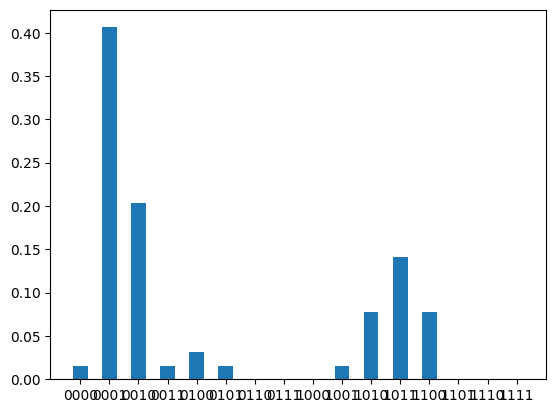



7
{'0000': 12, '0001': 290, '0010': 320, '0011': 68, '0100': 6, '0101': 46, '0110': 9, '1001': 75, '1010': 17, '1011': 73, '1100': 79, '1101': 5}
{'0000': 0.0078125, '0001': 0.2890625, '0010': 0.3203125, '0011': 0.078125, '0100': 0.0078125, '0101': 0.0390625, '0110': 0.0078125, '1001': 0.0703125, '1010': 0.015625, '1011': 0.078125, '1100': 0.078125, '1101': 0.0078125}
variance :  0.009307861328125
entropy :  1.850885924764534


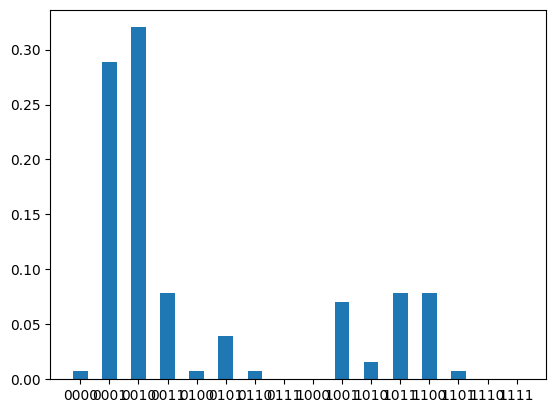



8
{'0000': 2, '0001': 202, '0010': 412, '0011': 54, '0100': 56, '0101': 7, '0110': 40, '0111': 3, '1001': 15, '1010': 13, '1011': 75, '1100': 82, '1101': 35, '1110': 4}
{'0000': 0.00390625, '0001': 0.1953125, '0010': 0.4140625, '0011': 0.05078125, '0100': 0.06640625, '0101': 0.0078125, '0110': 0.0390625, '0111': 0.00390625, '1001': 0.01953125, '1010': 0.01953125, '1011': 0.0625, '1100': 0.078125, '1101': 0.03515625, '1110': 0.00390625}
variance :  0.0104827880859375
entropy :  1.8889576265827437


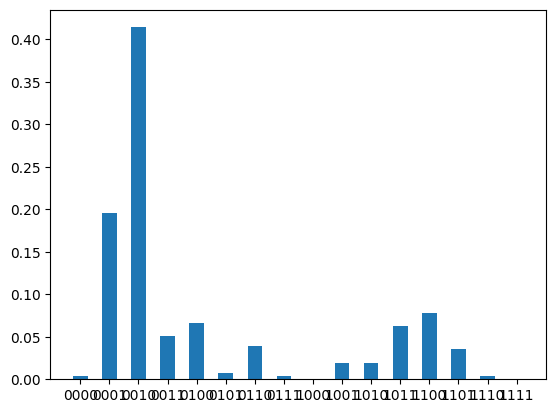



9
{'0000': 0, '0001': 137, '0010': 469, '0011': 17, '0100': 45, '0101': 28, '0110': 5, '0111': 26, '1000': 3, '1001': 84, '1010': 79, '1011': 34, '1100': 46, '1101': 1, '1110': 22, '1111': 4}
{'0000': 0.001953125, '0001': 0.126953125, '0010': 0.453125, '0011': 0.01953125, '0100': 0.05078125, '0101': 0.025390625, '0110': 0.0078125, '0111': 0.033203125, '1000': 0.001953125, '1001': 0.087890625, '1010': 0.080078125, '1011': 0.048828125, '1100': 0.0390625, '1101': 0.001953125, '1110': 0.01953125, '1111': 0.001953125}
variance :  0.01138448715209961
entropy :  1.9087593742074749


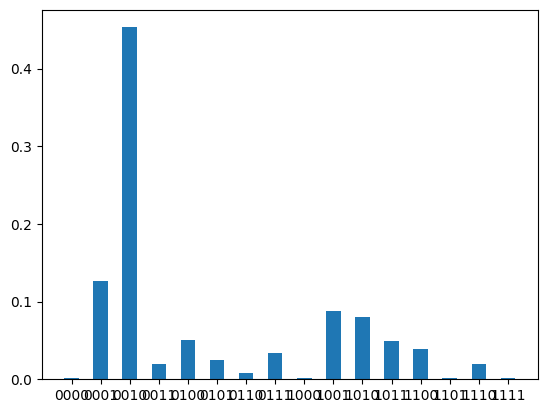



10
{'0000': 1, '0001': 83, '0010': 449, '0011': 74, '0100': 20, '0101': 49, '0110': 4, '0111': 10, '1000': 32, '1001': 24, '1010': 76, '1011': 99, '1100': 49, '1101': 13, '1110': 6, '1111': 11}
{'0000': 0.001953125, '0001': 0.080078124, '0010': 0.438476562, '0011': 0.080078124, '0100': 0.01953125, '0101': 0.059570312, '0110': 0.004882812, '0111': 0.012695312, '1000': 0.025390624, '1001': 0.036132813, '1010': 0.078125, '1011': 0.080078124, '1100': 0.051757812, '1101': 0.009765624, '1110': 0.004882812, '1111': 0.016601562}
variance :  0.01026535033532715
entropy :  2.0114505653646813


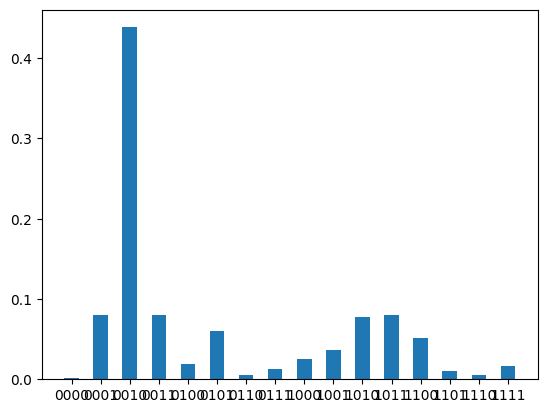



11
{'0000': 11, '0001': 53, '0010': 398, '0011': 39, '0100': 44, '0101': 15, '0110': 68, '0111': 0, '1000': 21, '1001': 22, '1010': 111, '1011': 105, '1100': 68, '1101': 31, '1110': 8, '1111': 6}
{'0000': 0.012207031, '0001': 0.05078125, '0010': 0.387207031, '0011': 0.031738281, '0100': 0.05078125, '0101': 0.018066406, '0110': 0.063476562, '0111': 0.000976562, '1000': 0.020019531, '1001': 0.020019531, '1010': 0.113769531, '1011': 0.1015625, '1100': 0.08837890600000001, '1101': 0.029785156, '1110': 0.006347656, '1111': 0.004882812}
variance :  0.008182615045913695
entropy :  2.1009802162368123


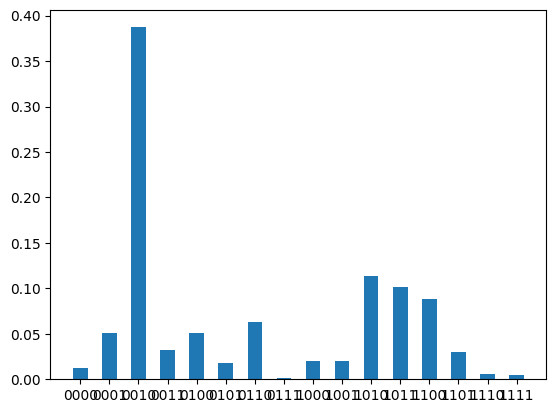



12
{'0000': 15, '0001': 44, '0010': 333, '0011': 106, '0100': 38, '0101': 27, '0110': 23, '0111': 48, '1000': 0, '1001': 0, '1010': 114, '1011': 85, '1100': 94, '1101': 37, '1110': 28, '1111': 8}
{'0000': 0.010009766, '0001': 0.041259766, '0010': 0.314697266, '0011': 0.107910157, '0100': 0.037353516, '0101': 0.027587891, '0110': 0.021728516, '0111': 0.047851562, '1000': 0.001220703, '1001': 0.000488282, '1010': 0.117675782, '1011': 0.103759766, '1100': 0.092041016, '1101': 0.039550782, '1110': 0.029785157, '1111': 0.007080078}
variance :  0.005655519672382355
entropy :  2.21803970751508


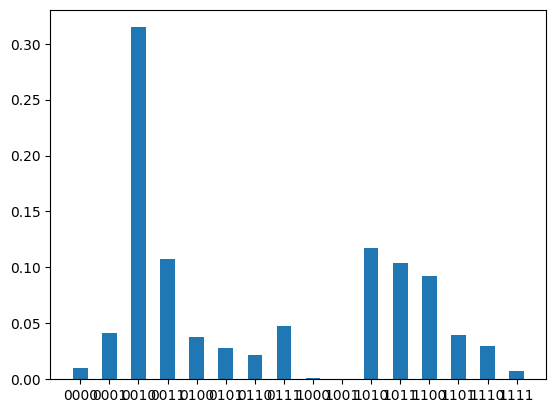



13
{'0000': 6, '0001': 17, '0010': 269, '0011': 116, '0100': 70, '0101': 14, '0110': 46, '0111': 20, '1000': 29, '1001': 61, '1010': 150, '1011': 91, '1100': 82, '1101': 0, '1110': 11, '1111': 18}
{'0000': 0.006103515, '0001': 0.01586914, '0010': 0.260986328, '0011': 0.11035156199999999, '0100': 0.076293945, '0101': 0.010009765, '0110': 0.048095703000000004, '0111': 0.025024414000000002, '1000': 0.025024414000000002, '1001': 0.067016601, '1010': 0.148071289, '1011': 0.084106445, '1100': 0.092041015, '1101': 0.00012207, '1110': 0.012207031, '1111': 0.018676758}
variance :  0.004376664762901306
entropy :  2.284572809316582


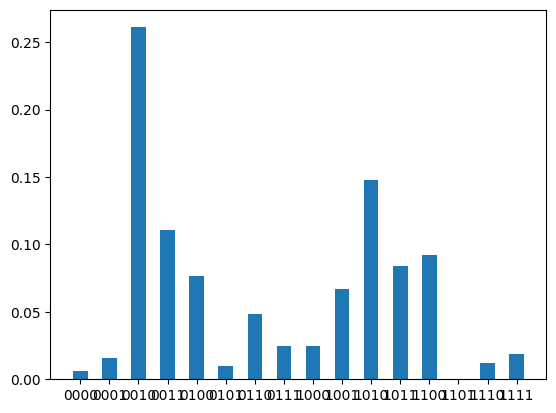



14
{'0000': 7, '0001': 18, '0010': 220, '0011': 213, '0100': 56, '0101': 94, '0110': 5, '0111': 56, '1000': 33, '1001': 90, '1010': 90, '1011': 59, '1100': 22, '1101': 7, '1110': 7, '1111': 23}
{'0000': 0.007141114, '0001': 0.01953125, '0010': 0.219970703, '0011': 0.21301269499999997, '0100': 0.049377441, '0101': 0.078674316, '0110': 0.006347657, '0111': 0.055236816, '1000': 0.03527832, '1001': 0.088195801, '1010': 0.103759766, '1011': 0.067993164, '1100': 0.02154541, '1101': 0.00793457, '1110': 0.006164551, '1111': 0.019836425999999997}
variance :  0.004299001753748893
entropy :  2.295524490966374


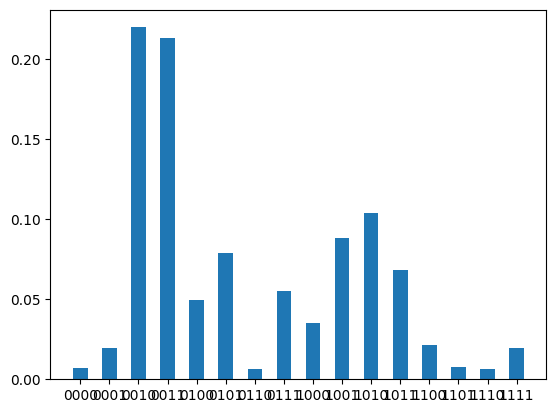



15
{'0000': 19, '0001': 19, '0010': 106, '0011': 145, '0100': 238, '0101': 73, '0110': 24, '0111': 9, '1000': 58, '1001': 21, '1010': 129, '1011': 45, '1100': 22, '1101': 78, '1110': 6, '1111': 8}
{'0000': 0.025939941, '0001': 0.017852783, '0010': 0.104614258, '0011': 0.149078369, '0100': 0.238433838, '0101': 0.07257080099999999, '0110': 0.024200439, '0111': 0.013214111, '1000': 0.046417236, '1001': 0.025054931000000003, '1010': 0.12512207, '1011': 0.045166016, '1100': 0.026397705, '1101': 0.07705688399999999, '1110': 0.004425049, '1111': 0.004455566}
variance :  0.003855590136862815
entropy :  2.3423286623280855


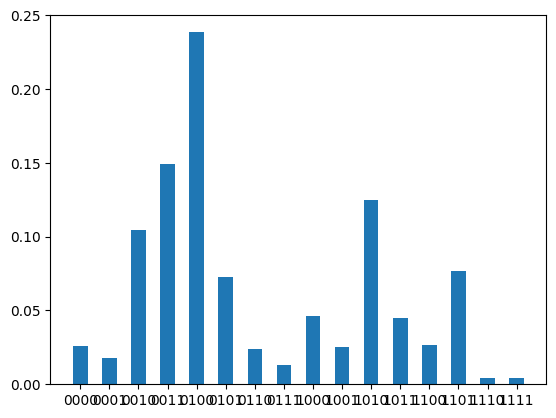



16
{'0000': 7, '0001': 28, '0010': 70, '0011': 97, '0100': 355, '0101': 119, '0110': 26, '0111': 8, '1000': 39, '1001': 70, '1010': 57, '1011': 48, '1100': 48, '1101': 26, '1110': 0, '1111': 2}
{'0000': 0.005432129, '0001': 0.035537719, '0010': 0.073196411, '0011': 0.116043091, '0100': 0.345367431, '0101': 0.103103638, '0110': 0.024795532999999998, '0111': 0.005889893, '1000': 0.03604126, '1001': 0.082427979, '1010': 0.043655396, '1011': 0.047912598, '1100': 0.050430298, '1101': 0.025054931, '1110': 0.000152588, '1111': 0.0049591060000000005}
variance :  0.006479063632226886
entropy :  2.190026265174582


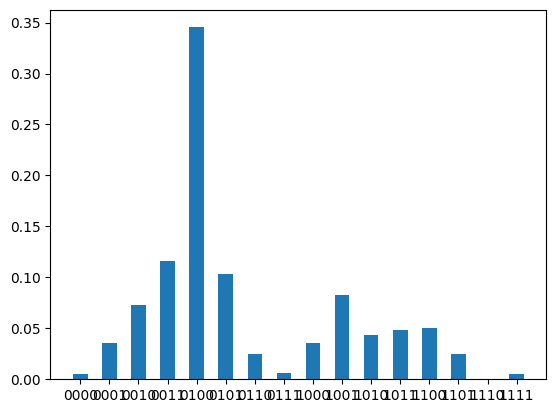



17
{'0000': 4, '0001': 2, '0010': 89, '0011': 49, '0100': 452, '0101': 107, '0110': 5, '0111': 30, '1000': 3, '1001': 16, '1010': 35, '1011': 41, '1100': 55, '1101': 103, '1110': 5, '1111': 4}
{'0000': 0.006080628, '0001': 0.001564026, '0010': 0.091995239, '0011': 0.05695343, '0100': 0.44733429, '0101': 0.103370667, '0110': 0.003921509, '0111': 0.024574279, '1000': 0.00515747, '1001': 0.019447326, '1010': 0.027053833, '1011': 0.053749084, '1100': 0.051551819, '1101': 0.097076416, '1110': 0.006011963, '1111': 0.00415802}
variance :  0.011051218629056296
entropy :  1.92248234892855


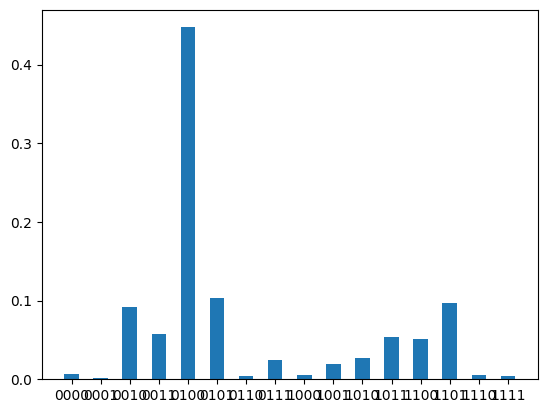



18
{'0000': 11, '0001': 1, '0010': 80, '0011': 36, '0100': 414, '0101': 63, '0110': 71, '0111': 10, '1000': 12, '1001': 41, '1010': 72, '1011': 51, '1100': 14, '1101': 16, '1110': 101, '1111': 7}
{'0000': 0.006599427, '0001': 0.002235413, '0010': 0.09065627999999999, '0011': 0.033969879, '0100': 0.414009095, '0101': 0.07032013000000001, '0110': 0.067493439, '0111': 0.010318756, '1000': 0.018909455, '1001': 0.036273956, '1010': 0.057376862, '1011': 0.045459747, '1100': 0.025550842, '1101': 0.016803741, '1110': 0.097808838, '1111': 0.006214142000000001}
variance :  0.009093988209553787
entropy :  2.0813880719920226


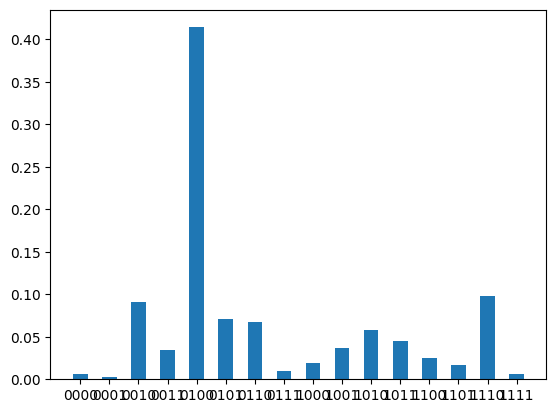



19
{'0000': 9, '0001': 6, '0010': 40, '0011': 61, '0100': 215, '0101': 186, '0110': 117, '0111': 36, '1000': 7, '1001': 3, '1010': 73, '1011': 49, '1100': 44, '1101': 32, '1110': 52, '1111': 70}
{'0000': 0.006814957, '0001': 0.006011963, '0010': 0.043420792, '0011': 0.064029693, '0100': 0.23154640199999998, '0101': 0.185676574, '0110': 0.10507392900000001, '0111': 0.042896271, '1000': 0.005924225, '1001': 0.001771926, '1010': 0.08020400999999999, '1011': 0.044681549, '1100': 0.045022965, '1101': 0.023303986, '1110': 0.049028397, '1111': 0.064592361}
variance :  0.0038844600807422026
entropy :  2.334982388796122


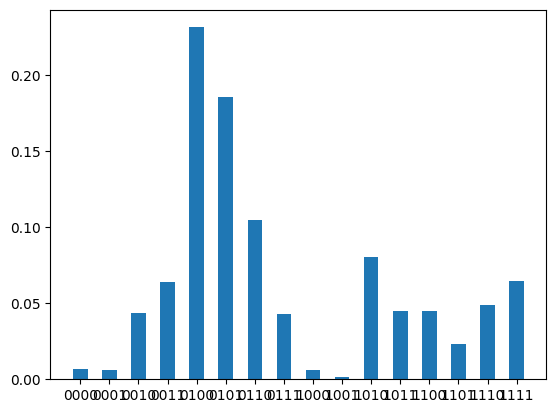



20
{'0000': 31, '0001': 12, '0010': 14, '0011': 95, '0100': 143, '0101': 160, '0110': 199, '0111': 44, '1000': 3, '1001': 0, '1010': 86, '1011': 3, '1100': 93, '1101': 9, '1110': 78, '1111': 30}
{'0000': 0.034799576, '0001': 0.007943153, '0010': 0.015610695, '0011': 0.080864906, '0100': 0.143380165, '0101': 0.180363655, '0110': 0.196003914, '0111': 0.042786597999999995, '1000': 0.005226135, '1001': 0.000210762, '1010': 0.09472370100000001, '1011': 0.001289368, '1100': 0.089402199, '1101': 0.003914833, '1110': 0.070633888, '1111': 0.032846451}
variance :  0.00387323697728959
entropy :  2.26327550305102


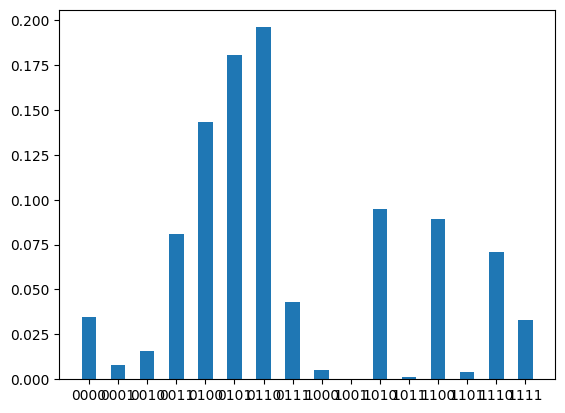



21
{'0000': 29, '0001': 26, '0010': 1, '0011': 94, '0100': 108, '0101': 234, '0110': 197, '0111': 46, '1000': 17, '1001': 4, '1010': 63, '1011': 5, '1100': 90, '1101': 0, '1110': 9, '1111': 77}
{'0000': 0.033945084, '0001': 0.032045842000000005, '0010': 0.001591683, '0011': 0.092106819, '0100': 0.10916996, '0101': 0.24318408900000002, '0110': 0.195935249, '0111': 0.032563209, '1000': 0.015461445, '1001': 0.001774788, '1010': 0.066514015, '1011': 0.003925801, '1100': 0.089592457, '1101': 6.9142e-05, '1110': 0.004281044, '1111': 0.077839374}
variance :  0.00484117566979738
entropy :  2.1881450095115444


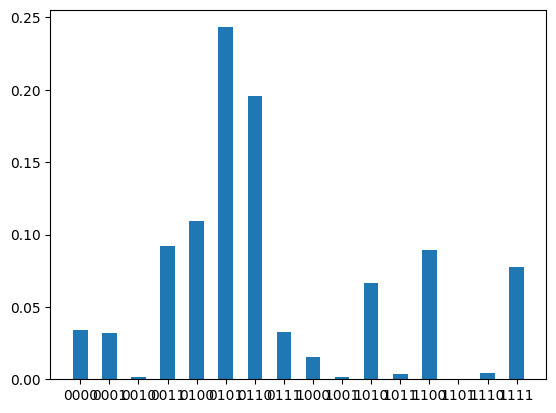



22
{'0000': 66, '0001': 29, '0010': 27, '0011': 68, '0100': 139, '0101': 225, '0110': 127, '0111': 121, '1000': 17, '1001': 45, '1010': 53, '1011': 6, '1100': 48, '1101': 15, '1110': 3, '1111': 11}
{'0000': 0.065526247, '0001': 0.034976243, '0010': 0.029923678000000002, '0011': 0.061420441, '0100': 0.14425754600000001, '0101': 0.23461341800000002, '0110': 0.111579895, '0111': 0.11415958400000001, '1000': 0.018340349, '1001': 0.048954487, '1010': 0.051826477, '1011': 0.006152391, '1100': 0.044392109, '1101': 0.01593709, '1110': 0.004321337000000001, '1111': 0.013618708}
variance :  0.003556665121321709
entropy :  2.3761337436727987


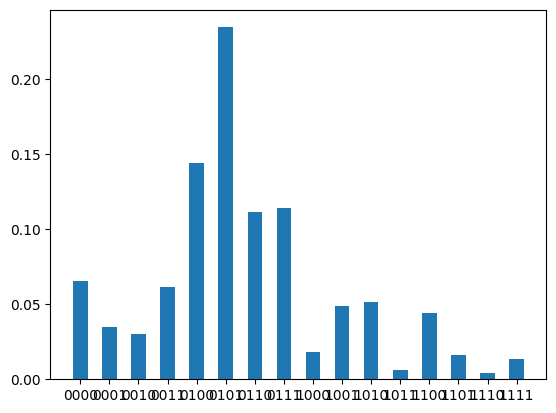



23
{'0000': 52, '0001': 37, '0010': 53, '0011': 56, '0100': 197, '0101': 152, '0110': 97, '0111': 99, '1000': 97, '1001': 19, '1010': 38, '1011': 23, '1100': 31, '1101': 31, '1110': 8, '1111': 10}
{'0000': 0.048729180999999996, '0001': 0.032361269, '0010': 0.043708086, '0011': 0.05991363500000001, '0100': 0.175425052, '0101': 0.16276598, '0110': 0.096178055, '0111': 0.112884998, '1000': 0.107255578, '1001': 0.02156651, '1010': 0.035937429, '1011': 0.021746755, '1100': 0.036488176, '1101': 0.029650331000000002, '1110': 0.006003618, '1111': 0.009385348}
variance :  0.002609358131485356
entropy :  2.460625988545819


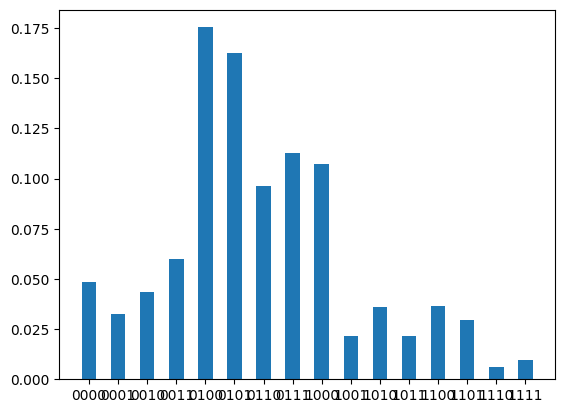



24
{'0000': 8, '0001': 78, '0010': 4, '0011': 4, '0100': 170, '0101': 130, '0110': 57, '0111': 176, '1000': 123, '1001': 41, '1010': 69, '1011': 55, '1100': 32, '1101': 38, '1110': 8, '1111': 7}
{'0000': 0.00797391, '0001': 0.071816445, '0010': 0.002245426, '0011': 0.000909925, '0100': 0.16023087500000002, '0101': 0.12934351, '0110': 0.059844255, '0111': 0.183833361, '1000': 0.101722538, '1001': 0.036967397, '1010': 0.10287189499999999, '1011': 0.054498315000000006, '1100': 0.028830648, '1101': 0.041373372, '1110': 0.008381664, '1111': 0.009156466}
variance :  0.0031544114157884963
entropy :  2.3495618469614077


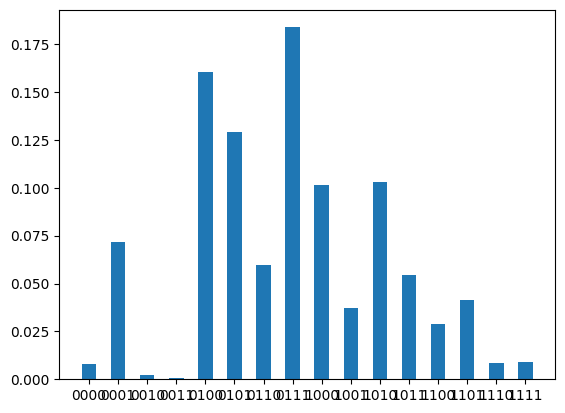



25
{'0000': 6, '0001': 6, '0010': 82, '0011': 111, '0100': 91, '0101': 188, '0110': 76, '0111': 171, '1000': 83, '1001': 53, '1010': 0, '1011': 44, '1100': 26, '1101': 53, '1110': 0, '1111': 10}
{'0000': 0.008188486, '0001': 0.006329179, '0010': 0.073430061, '0011': 0.104296208, '0100': 0.087780237, '0101': 0.179768205, '0110': 0.07569611100000001, '0111': 0.190401316, '1000': 0.08647146800000001, '1001': 0.047939539, '1010': 0.000505447, '1011': 0.054006219, '1100': 0.023392200000000002, '1101': 0.050382763000000004, '1110': 0.000309259, '1111': 0.011103301999999999}
variance :  0.0032364225433077097
entropy :  2.341781224995068


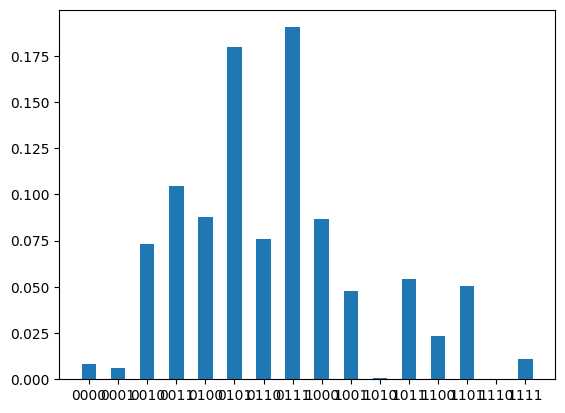



26
{'0000': 1, '0001': 16, '0010': 27, '0011': 5, '0100': 137, '0101': 180, '0110': 73, '0111': 134, '1000': 94, '1001': 9, '1010': 86, '1011': 38, '1100': 34, '1101': 97, '1110': 59, '1111': 10}
{'0000': 0.001163378, '0001': 0.012345611999999999, '0010': 0.026342927999999998, '0011': 0.00797391, '0100': 0.11804986, '0101': 0.21463423999999998, '0110': 0.074099183, '0111': 0.133738577, '1000': 0.09851659900000001, '1001': 0.00859119, '1010': 0.086286783, '1011': 0.032905639, '1100': 0.037844479, '1101': 0.088268295, '1110': 0.048524648, '1111': 0.01071468}
variance :  0.0032370052517263375
entropy :  2.3673808780021743


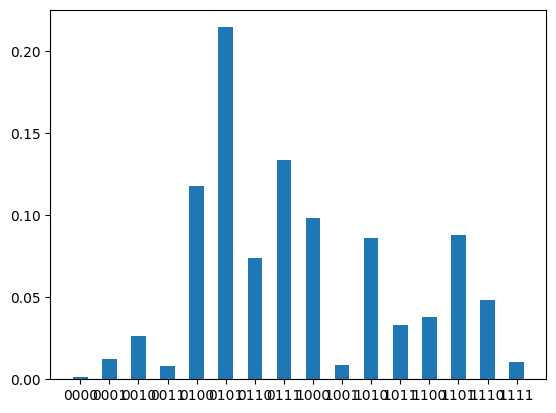



27
{'0000': 5, '0001': 12, '0010': 19, '0011': 1, '0100': 114, '0101': 188, '0110': 70, '0111': 66, '1000': 90, '1001': 35, '1010': 6, '1011': 104, '1100': 16, '1101': 129, '1110': 114, '1111': 31}
{'0000': 0.003820487, '0001': 0.013331391, '0010': 0.019681752, '0011': 0.001062818, '0100': 0.12347436, '0101': 0.188410908, '0110': 0.074492842, '0111': 0.07282498500000001, '1000': 0.08839766, '1001': 0.037870921, '1010': 0.008883626, '1011': 0.10255613899999999, '1100': 0.016401589, '1101': 0.105254844, '1110': 0.11036325200000001, '1111': 0.033172428000000004}
variance :  0.0027594473542539317
entropy :  2.3949606194502597


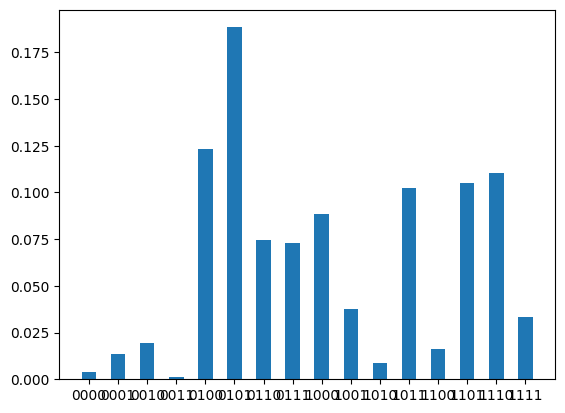



28
{'0000': 6, '0001': 3, '0010': 26, '0011': 14, '0100': 108, '0101': 131, '0110': 170, '0111': 1, '1000': 110, '1001': 26, '1010': 9, '1011': 118, '1100': 30, '1101': 43, '1110': 172, '1111': 33}
{'0000': 0.004977289, '0001': 0.004873492, '0010': 0.022124175, '0011': 0.022034366, '0100': 0.089169387, '0101': 0.119816676, '0110': 0.176910311, '0111': 0.002939135, '1000': 0.12562092, '1001': 0.031681731, '1010': 0.008012597, '1011': 0.097261458, '1100': 0.023108974, '1101': 0.050717182, '1110': 0.17979973900000001, '1111': 0.040952566999999995}
variance :  0.003472267849956888
entropy :  2.3269996597063796


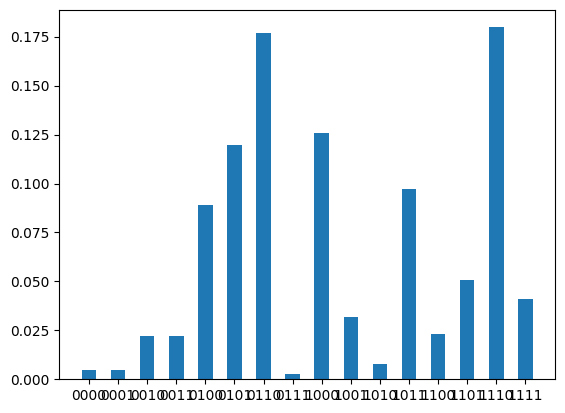



29
{'0000': 2, '0001': 10, '0010': 0, '0011': 30, '0100': 33, '0101': 175, '0110': 171, '0111': 2, '1000': 116, '1001': 19, '1010': 40, '1011': 32, '1100': 88, '1101': 7, '1110': 235, '1111': 40}
{'0000': 0.002457131, '0001': 0.009722525, '0010': 6.3585e-05, '0011': 0.03330774, '0100': 0.04218379, '0101': 0.168680856, '0110': 0.18081513800000001, '0111': 0.001365572, '1000': 0.12796890900000002, '1001': 0.02453138, '1010': 0.036992047, '1011': 0.02516544, '1100': 0.075788834, '1101': 0.003445173, '1110': 0.22842403, '1111': 0.03908785}
variance :  0.0050049632544206905
entropy :  2.1734874722535826


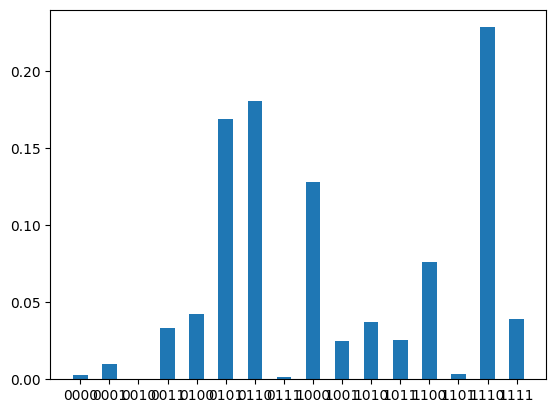



30
{'0000': 20, '0001': 2, '0010': 7, '0011': 38, '0100': 5, '0101': 183, '0110': 119, '0111': 63, '1000': 87, '1001': 46, '1010': 25, '1011': 2, '1100': 55, '1101': 79, '1110': 232, '1111': 37}
{'0000': 0.024762191000000003, '0001': 0.001672396, '0010': 0.009725438999999999, '0011': 0.042874113000000005, '0100': 0.010555212, '0101': 0.200003297, '0110': 0.126417261, '0111': 0.060643603, '1000': 0.08386650799999999, '1001': 0.044404675, '1010': 0.028079608000000002, '1011': 0.004197363, '1100': 0.055728768, '1101': 0.063110695, '1110': 0.208493726, '1111': 0.035465145}
variance :  0.0038404970487844834
entropy :  2.333746480471997


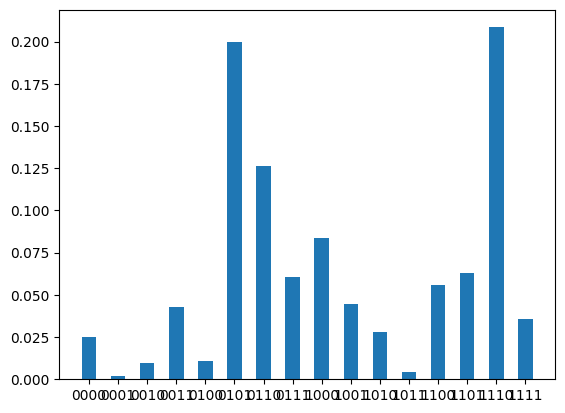



31
{'0000': 64, '0001': 6, '0010': 4, '0011': 44, '0100': 39, '0101': 190, '0110': 101, '0111': 52, '1000': 70, '1001': 3, '1010': 15, '1011': 18, '1100': 49, '1101': 63, '1110': 153, '1111': 129}
{'0000': 0.051989348000000005, '0001': 0.008865528000000001, '0010': 0.0058841629999999995, '0011': 0.048725721, '0100': 0.036554236600000005, '0101': 0.18814996, '0110': 0.11161679899999999, '0111': 0.061281873, '1000': 0.070795125, '1001': 0.003700551, '1010': 0.011011088, '1011': 0.013666912, '1100': 0.058217892, '1101': 0.060663489, '1110': 0.155039199, '1111': 0.11383811599999999}
variance :  0.00281500191179786
entropy :  2.412600591248608


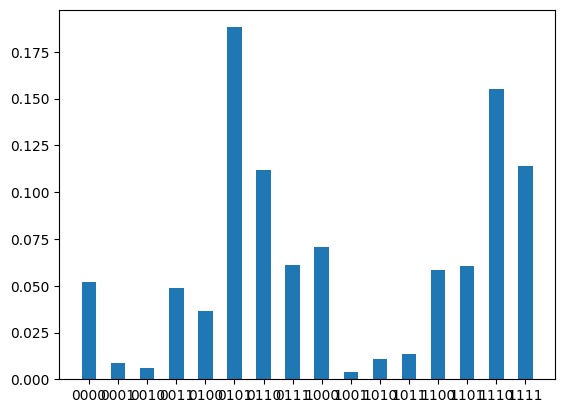



32
{'0000': 99, '0001': 12, '0010': 1, '0011': 10, '0100': 18, '0101': 161, '0110': 154, '0111': 77, '1000': 71, '1001': 75, '1010': 56, '1011': 11, '1100': 45, '1101': 0, '1110': 11, '1111': 199}
{'0000': 0.102490571, '0001': 0.008715956, '0010': 0.002734339, '0011': 0.014309065000000001, '0100': 0.019987941000000002, '0101': 0.155668781, '0110': 0.151297801, '0111': 0.071667567, '1000': 0.07148790799999999, '1001': 0.069431471, '1010': 0.052004859, '1011': 0.010335247, '1100': 0.045901079, '1101': 0.000361461, '1110': 0.008903213, '1111': 0.214702739}
variance :  0.003873638064579194
entropy :  2.2855501600779524


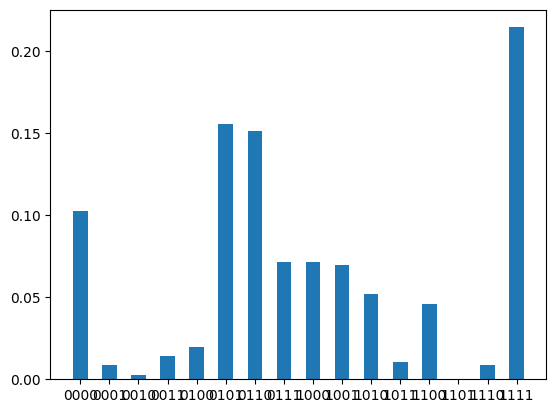



33
{'0000': 113, '0001': 9, '0010': 1, '0011': 75, '0100': 18, '0101': 32, '0110': 281, '0111': 54, '1000': 63, '1001': 40, '1010': 4, '1011': 41, '1100': 15, '1101': 37, '1110': 2, '1111': 215}
{'0000': 0.112706712, '0001': 0.007829257999999999, '0010': 0.0009880380000000001, '0011': 0.074423598, '0100': 0.017590672, '0101': 0.043315038, '0110': 0.275062879, '0111': 0.06596548299999999, '1000': 0.052750864999999994, '1001': 0.035058029, '1010': 0.0037321940000000003, '1011': 0.047303868, '1100': 0.015321038, '1101': 0.034309361, '1110': 0.001023436, '1111': 0.212619532}
variance :  0.005680243029736282
entropy :  2.1794455798027936


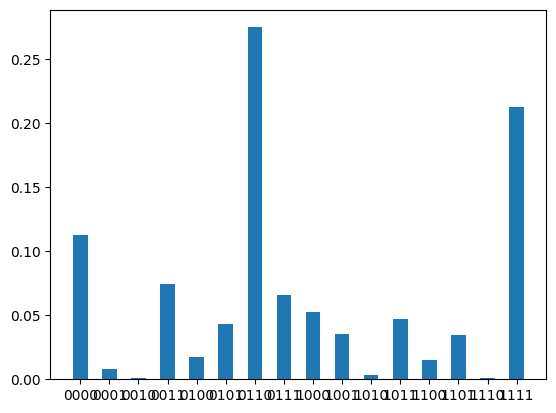



34
{'0000': 152, '0001': 22, '0010': 1, '0011': 18, '0100': 76, '0101': 41, '0110': 277, '0111': 56, '1000': 22, '1001': 24, '1010': 12, '1011': 48, '1100': 34, '1101': 66, '1110': 4, '1111': 147}
{'0000': 0.154231615, '0001': 0.028163857, '0010': 0.0038540759999999997, '0011': 0.019560051, '0100': 0.079677874, '0101': 0.043648809000000004, '0110': 0.275589762, '0111': 0.049430686, '1000': 0.022640696999999998, '1001': 0.030632020000000003, '1010': 0.01192441, '1011': 0.042908533, '1100': 0.022541023, '1101': 0.062644721, '1110': 0.0044807810000000005, '1111': 0.148071087}
variance :  0.004933548342641184
entropy :  2.275857728139507


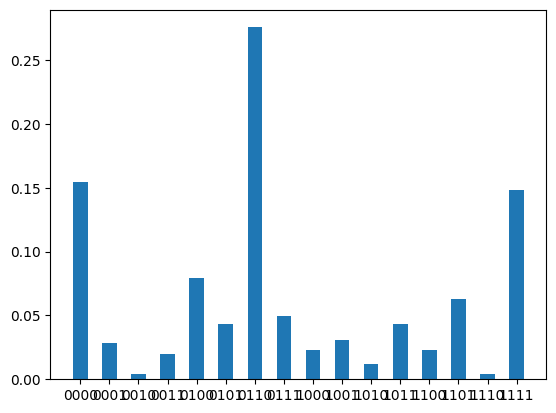



35
{'0000': 84, '0001': 149, '0010': 32, '0011': 26, '0100': 92, '0101': 18, '0110': 200, '0111': 162, '1000': 18, '1001': 17, '1010': 7, '1011': 39, '1100': 9, '1101': 28, '1110': 57, '1111': 62}
{'0000': 0.08678915300000001, '0001': 0.157420366, '0010': 0.026891447, '0011': 0.023026012000000002, '0100': 0.08002086, '0101': 0.022333022, '0110': 0.18210523299999998, '0111': 0.151184403, '1000': 0.022125582, '1001': 0.026236447000000003, '1010': 0.01264931, '1011': 0.042207694, '1100': 0.010111511, '1101': 0.031805781, '1110': 0.061227445000000005, '1111': 0.063865735}
variance :  0.002878055420811856
entropy :  2.4415730004750613


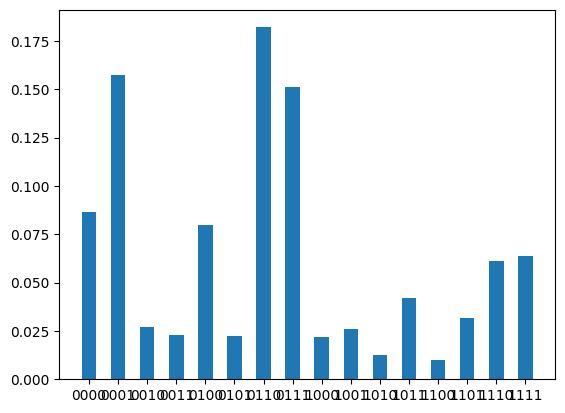



36
{'0000': 64, '0001': 149, '0010': 75, '0011': 17, '0100': 70, '0101': 13, '0110': 168, '0111': 177, '1000': 41, '1001': 36, '1010': 17, '1011': 13, '1100': 41, '1101': 7, '1110': 48, '1111': 64}
{'0000': 0.056343642, '0001': 0.155769044, '0010': 0.075387387, '0011': 0.025553517999999997, '0100': 0.06772297099999999, '0101': 0.016623350999999998, '0110': 0.179389828, '0111': 0.15940004, '1000': 0.032799034000000005, '1001': 0.033770227, '1010': 0.024515342000000002, '1011': 0.013705233, '1100': 0.045573491, '1101': 0.009087643, '1110': 0.044255452, '1111': 0.060103798}
variance :  0.0027788900781666875
entropy :  2.4583163258567393


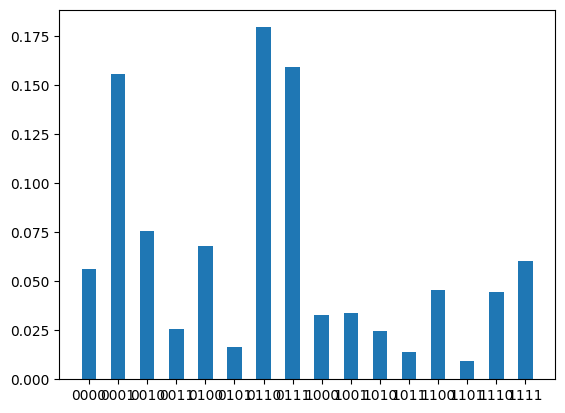



37
{'0000': 54, '0001': 142, '0010': 74, '0011': 8, '0100': 70, '0101': 30, '0110': 151, '0111': 184, '1000': 18, '1001': 7, '1010': 21, '1011': 23, '1100': 56, '1101': 51, '1110': 37, '1111': 74}
{'0000': 0.058152567999999995, '0001': 0.15213945799999998, '0010': 0.07620151500000001, '0011': 0.009678594, '0100': 0.054117633, '0101': 0.029725448, '0110': 0.153529584, '0111': 0.16829504099999998, '1000': 0.022237475, '1001': 0.0062450940000000005, '1010': 0.024368768, '1011': 0.022986562000000002, '1100': 0.052474493, '1101': 0.059098489, '1110': 0.037355185, '1111': 0.073394093}
variance :  0.0025199617684748587
entropy :  2.472804914724381


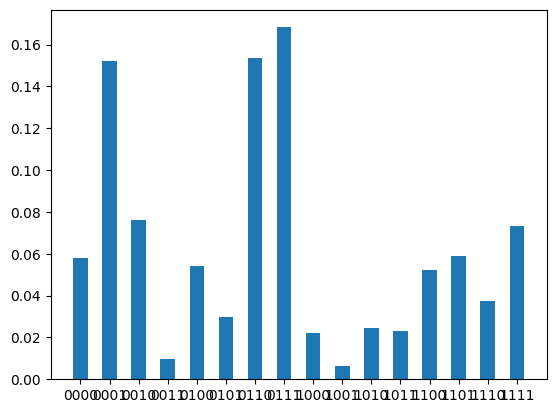



38
{'0000': 98, '0001': 93, '0010': 116, '0011': 5, '0100': 47, '0101': 50, '0110': 66, '0111': 246, '1000': 27, '1001': 1, '1010': 45, '1011': 44, '1100': 56, '1101': 15, '1110': 79, '1111': 12}
{'0000': 0.107953463, '0001': 0.082395209, '0010': 0.10718365099999999, '0011': 0.005817231, '0100': 0.043176413999999996, '0101': 0.041023616, '0110': 0.049229072, '0111': 0.254215025, '1000': 0.030037369, '1001': 0.003748282, '1010': 0.06477181500000001, '1011': 0.036201935, '1100': 0.056504935, '1101': 0.014982997999999999, '1110': 0.09355181200000001, '1111': 0.009207176000000001}
variance :  0.0035460805338576595
entropy :  2.392150407217311


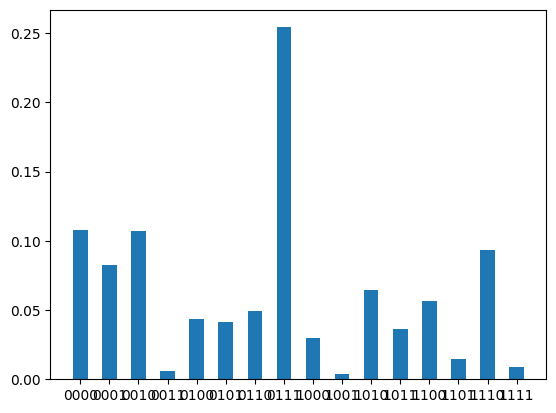



39
{'0000': 107, '0001': 7, '0010': 67, '0011': 69, '0100': 35, '0101': 56, '0110': 20, '0111': 297, '1000': 33, '1001': 24, '1010': 100, '1011': 42, '1100': 47, '1101': 2, '1110': 0, '1111': 94}
{'0000': 0.115186601, '0001': 0.009348802, '0010': 0.086189295, '0011': 0.055760713999999996, '0100': 0.03307485, '0101': 0.05488965999999999, '0110': 0.022063679000000003, '0111': 0.28137381, '1000': 0.031540138, '1001': 0.023083969, '1010': 0.09568549500000001, '1011': 0.046082871, '1100': 0.047735532, '1101': 0.003157952, '1110': 0.002476799, '1111': 0.092349833}
variance :  0.004299270441059109
entropy :  2.338492027067612


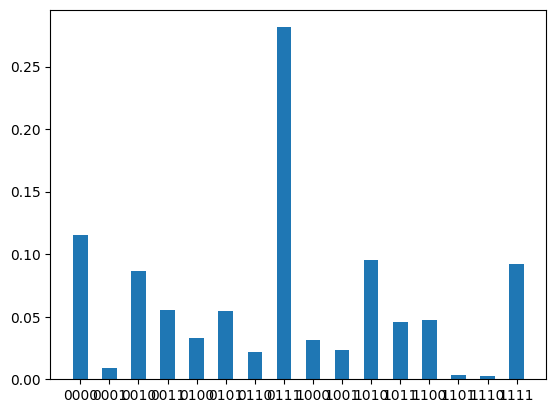



40
{'0000': 145, '0001': 36, '0010': 82, '0011': 86, '0100': 33, '0101': 89, '0110': 16, '0111': 216, '1000': 67, '1001': 17, '1010': 47, '1011': 52, '1100': 64, '1101': 10, '1110': 3, '1111': 37}
{'0000': 0.140452286, '0001': 0.03515835, '0010': 0.073655781, '0011': 0.07326975, '0100': 0.024222276, '0101': 0.081385959, '0110': 0.019909527, '0111': 0.231152404, '1000': 0.078379739, '1001': 0.021190438, '1010': 0.049256945, '1011': 0.049197908000000005, '1100': 0.06908171, '1101': 0.008396538, '1110': 0.002771836, '1111': 0.042518554}
variance :  0.0030245121560040227
entropy :  2.440897045335254


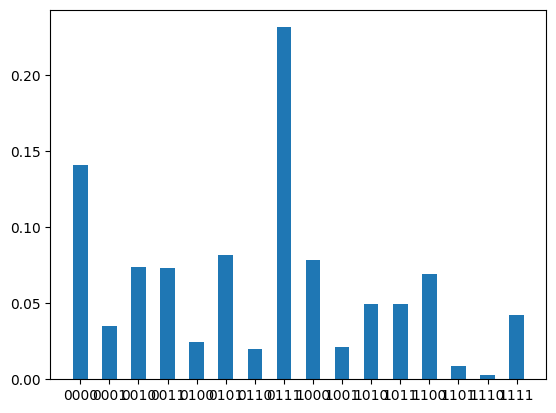



41
{'0000': 174, '0001': 1, '0010': 78, '0011': 60, '0100': 5, '0101': 104, '0110': 20, '0111': 141, '1000': 158, '1001': 63, '1010': 113, '1011': 4, '1100': 39, '1101': 21, '1110': 7, '1111': 12}
{'0000': 0.16922667000000002, '0001': 0.005068338, '0010': 0.078495815, '0011': 0.054274502, '0100': 0.005825679, '0101': 0.100801538, '0110': 0.018327648000000002, '0111': 0.151564358, '1000': 0.157938377, '1001': 0.070912247, '1010': 0.098143714, '1011': 0.013724145, '1100': 0.038861908, '1101': 0.016928223, '1110': 0.006728688, '1111': 0.013178147000000001}
variance :  0.0031614115366215647
entropy :  2.357627640851495


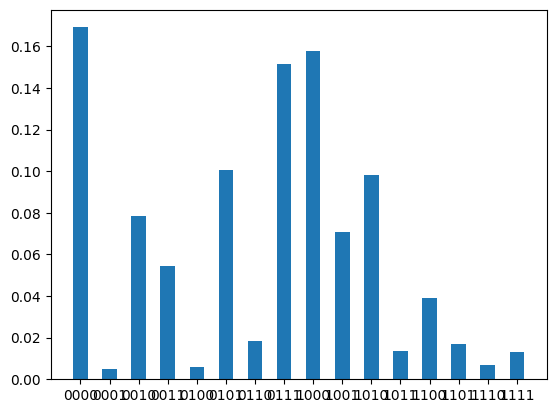



42
{'0000': 37, '0001': 150, '0010': 93, '0011': 26, '0100': 14, '0101': 76, '0110': 24, '0111': 110, '1000': 179, '1001': 22, '1010': 41, '1011': 116, '1100': 39, '1101': 47, '1110': 15, '1111': 11}
{'0000': 0.030146358999999998, '0001': 0.155226885, '0010': 0.07790644000000001, '0011': 0.026917879, '0100': 0.014153767999999999, '0101': 0.091424299, '0110': 0.02385877, '0111': 0.10168173100000001, '1000': 0.211577656, '1001': 0.015544217999999999, '1010': 0.04653659, '1011': 0.094713913, '1100': 0.037271617, '1101': 0.049042933, '1110': 0.016147794, '1111': 0.007849146}
variance :  0.0030640732108574566
entropy :  2.42587903120938


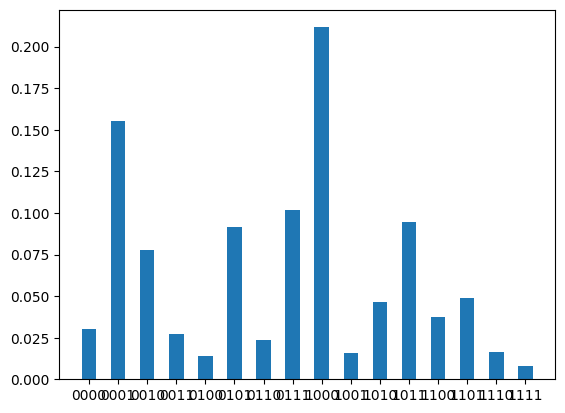



43
{'0000': 2, '0001': 134, '0010': 93, '0011': 18, '0100': 11, '0101': 46, '0110': 78, '0111': 70, '1000': 216, '1001': 61, '1010': 65, '1011': 64, '1100': 75, '1101': 22, '1110': 31, '1111': 14}
{'0000': 0.000990907, '0001': 0.134790223, '0010': 0.088233219, '0011': 0.020887711, '0100': 0.017070183, '0101': 0.0450404, '0110': 0.070080642, '0111': 0.070530016, '1000': 0.229311548, '1001': 0.058477175000000006, '1010': 0.06360803500000001, '1011': 0.063950077, '1100': 0.060414693, '1101': 0.026380769, '1110': 0.030924754999999998, '1111': 0.019309646}
variance :  0.0028694147171671757
entropy :  2.458396578620147


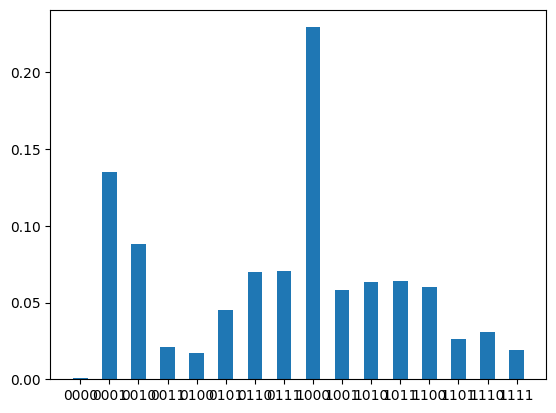



44
{'0000': 25, '0001': 118, '0010': 93, '0011': 55, '0100': 8, '0101': 50, '0110': 92, '0111': 47, '1000': 215, '1001': 68, '1010': 22, '1011': 125, '1100': 18, '1101': 36, '1110': 25, '1111': 3}
{'0000': 0.020030668, '0001': 0.123203127, '0010': 0.099421772, '0011': 0.058655192, '0100': 0.005281045, '0101': 0.03982712, '0110': 0.088424964, '0111': 0.041583992, '1000': 0.224387026, '1001': 0.06481996400000001, '1010': 0.018020388000000002, '1011': 0.126368549, '1100': 0.022154796999999997, '1101': 0.036618935, '1110': 0.026101817000000003, '1111': 0.005100643}
variance :  0.0031844789204754547
entropy :  2.408991058216445


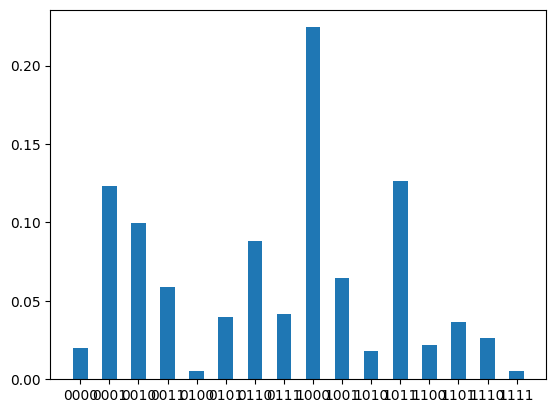



45
{'0000': 5, '0001': 77, '0010': 75, '0011': 78, '0100': 23, '0101': 1, '0110': 124, '0111': 15, '1000': 215, '1001': 33, '1010': 128, '1011': 118, '1100': 12, '1101': 36, '1110': 42, '1111': 18}
{'0000': 0.007087370999999999, '0001': 0.076420213, '0010': 0.078944826, '0011': 0.075918364, '0100': 0.026937383000000002, '0101': 0.000676899, '0110': 0.120606816, '0111': 0.019096909000000002, '1000': 0.219017147, '1001': 0.025996962999999998, '1010': 0.118538457, '1011': 0.132720349, '1100': 0.009043242, '1101': 0.035468430999999995, '1110': 0.036287569, '1111': 0.017239062}
variance :  0.003392944520895523
entropy :  2.3603857199374554


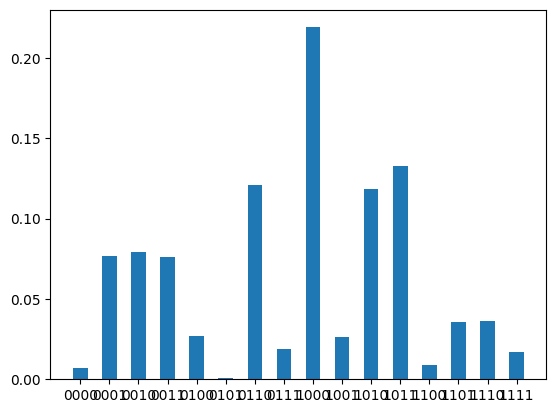



46
{'0000': 22, '0001': 66, '0010': 12, '0011': 121, '0100': 101, '0101': 2, '0110': 125, '0111': 21, '1000': 180, '1001': 20, '1010': 81, '1011': 115, '1100': 40, '1101': 54, '1110': 17, '1111': 23}
{'0000': 0.022063891999999998, '0001': 0.06877191399999999, '0010': 0.014838646, '0011': 0.114165111, '0100': 0.089442113, '0101': 0.003384238, '0110': 0.116928576, '0111': 0.022566139, '1000': 0.184647405, '1001': 0.017959515, '1010': 0.08304832300000001, '1011': 0.09907100099999999, '1100': 0.042390510000000006, '1101': 0.060700511, '1110': 0.023068214, '1111': 0.036953890999999996}
variance :  0.002291978264381355
entropy :  2.4828632627727263


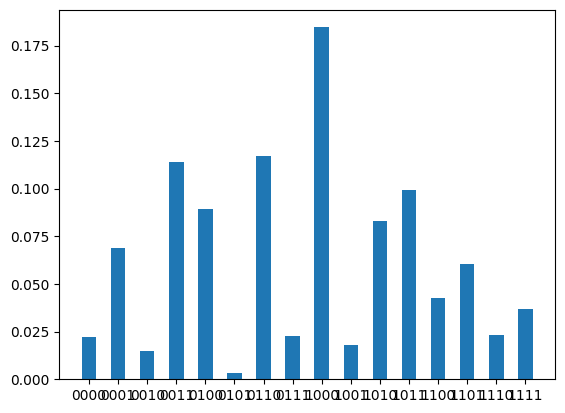



47
{'0000': 9, '0001': 47, '0010': 69, '0011': 79, '0100': 149, '0101': 10, '0110': 57, '0111': 60, '1000': 102, '1001': 88, '1010': 60, '1011': 89, '1100': 30, '1101': 106, '1110': 10, '1111': 35}
{'0000': 0.012101174, '0001': 0.04845313, '0010': 0.056129961, '0011': 0.07031344299999999, '0100': 0.14173160499999998, '0101': 0.007977643, '0110': 0.06273222, '0111': 0.07436931000000001, '1000': 0.103008845, '1001': 0.094468245, '1010': 0.056900101, '1011': 0.083720656, '1100': 0.037492663, '1101': 0.101334832, '1110': 0.016274887, '1111': 0.032991288}
variance :  0.0012822436971639383
entropy :  2.5932968901904925


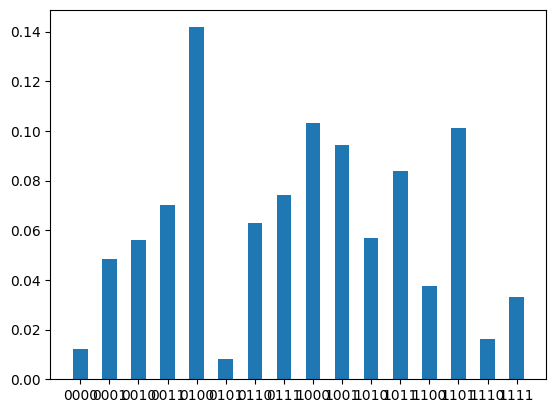



48
{'0000': 13, '0001': 4, '0010': 90, '0011': 40, '0100': 35, '0101': 144, '0110': 25, '0111': 108, '1000': 92, '1001': 85, '1010': 50, '1011': 82, '1100': 41, '1101': 123, '1110': 21, '1111': 47}
{'0000': 0.012361767, '0001': 0.00288319, '0010': 0.10102739499999999, '0011': 0.032165244, '0100': 0.027742483999999998, '0101': 0.14826377300000002, '0110': 0.026257966, '0111': 0.106632552, '1000': 0.07270823800000001, '1001': 0.091581868, '1010': 0.047220869, '1011': 0.099556401, '1100': 0.045085468000000004, '1101': 0.127251535, '1110': 0.023303183, '1111': 0.035958067}
variance :  0.0018494202894215536
entropy :  2.5226215273785515


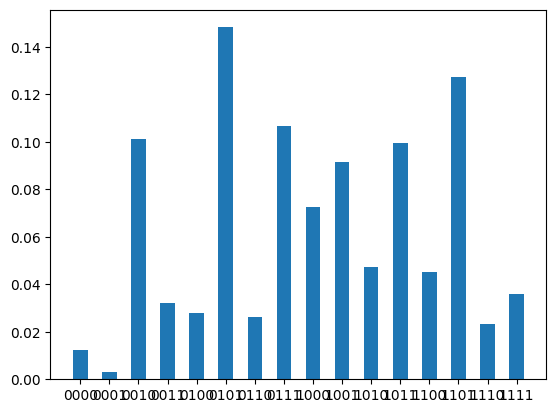



49
{'0000': 29, '0001': 20, '0010': 110, '0011': 76, '0100': 13, '0101': 61, '0110': 107, '0111': 99, '1000': 22, '1001': 120, '1010': 26, '1011': 20, '1100': 136, '1101': 122, '1110': 35, '1111': 4}
{'0000': 0.032217759000000006, '0001': 0.012129156, '0010': 0.10316952700000001, '0011': 0.064762333, '0100': 0.016555444, '0101': 0.060702479, '0110': 0.118525991, '0111': 0.118988611, '1000': 0.021792226999999997, '1001': 0.123591405, '1010': 0.023656947, '1011': 0.01722102, '1100': 0.1355979, '1101': 0.116143005, '1110': 0.030213286, '1111': 0.004732912}
variance :  0.0021941229650460836
entropy :  2.4721700607524584


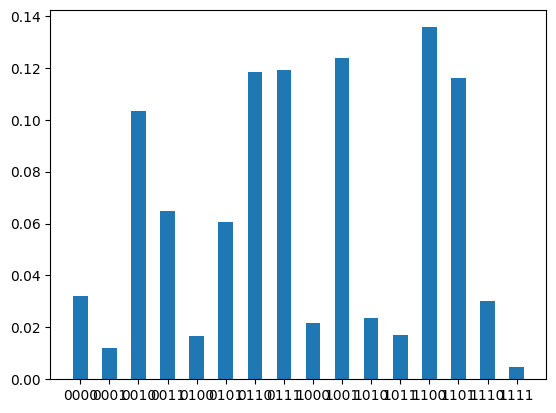

In [40]:
var_containingCL = []
entropy_containingCL = []
for N in range(50):
  coin_bit = QuantumRegister(1, 's')
  position_bits = QuantumRegister(4, 'p')
  classical_bis = ClassicalRegister(4, 'c')
  circuit = QuantumCircuit(coin_bit, position_bits, classical_bis)

  s = coin_bit
  p0, p1, p2, p3 = position_bits
  c0, c1, c2, c3 = classical_bis

  Ugate = Shift.to_gate().control(1)

  for i in range(N):
    circuit.barrier()
    circuit.h(s)
    circuit.append(Ugate, [s, p0, p1, p2, p3])

    qc1 = QuantumCircuit(2)
    qc1.swap(0,1)
    CSwapgate = qc1.to_gate().control(2)

    circuit.x(p2)
    circuit.append(CSwapgate, [p1,p2,p0,p3])
    circuit.x(p2)
    circuit.x(p1)
    circuit.append(C3XGate(), [p0,p1,p3,p2])
    circuit.x(p1)

  circuit.barrier()

  circuit.measure([p0, p1, p2, p3], [c0, c1, c2, c3])

  circuit_basis = transpile(circuit, qpu_backend)

  job = qpu_backend.run(circuit_basis, shots=1000)
  print(N)
  print(job.get_counts())
  print(job.get_probabilities())

  board = ['0000','0001','0010','0011','0100','0101','0110','0111','1000','1001','1010','1011','1100','1101','1110','1111']
  prob = []
  for i in board:
    prob.append(dict(job.get_probabilities()).get(i, 0))

  entropy = 0
  for i in range(16):
    if prob[i] != 0 :
      entropy = entropy - prob[i]*np.log(prob[i])

  var_containingCL.append(np.var(prob))
  entropy_containingCL.append(entropy)
  print("variance : ", np.var(prob))
  print("entropy : ", entropy)
  plt.bar(board, prob, 0.5)
  plt.xticks(board)
  plt.show()
  print()
  print()

compare entropy between task3 and task4

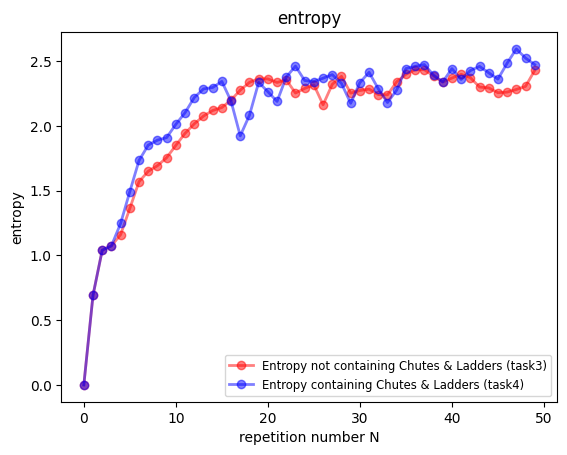

In [41]:
n = [i for i in range(50)]
plt.plot(n, entropy_notcontainingCL, color='red', marker='o', alpha=0.5, linewidth=2)
plt.plot(n, entropy_containingCL, color='blue', marker='o', alpha=0.5, linewidth=2)

plt.title("entropy")
plt.xlabel("repetition number N")
plt.ylabel("entropy")
plt.legend(["Entropy not containing Chutes & Ladders (task3)", "Entropy containing Chutes & Ladders (task4)"], fontsize="small")
plt.show()

compare variance between task3 and task4

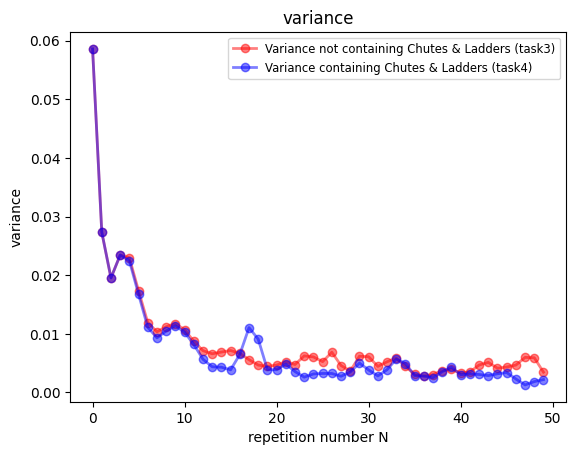

In [42]:
n = [i for i in range(50)]
plt.plot(n, var_notcontainingCL, color='red', marker='o', alpha=0.5, linewidth=2)
plt.plot(n, var_containingCL, color='blue', marker='o', alpha=0.5, linewidth=2)

plt.title("variance")
plt.xlabel("repetition number N")
plt.ylabel("variance")
plt.legend(["Variance not containing Chutes & Ladders (task3)", "Variance containing Chutes & Ladders (task4)"], fontsize="small")
plt.show()